<a href="https://colab.research.google.com/github/mitaash96/EDA-Practice/blob/main/HDK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House price prediction Kaggle
Part 1: from EDA to Feature Engineering

#Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset= pd.read_csv('/content/drive/MyDrive/Machine Learning Practice/Housing data kaggle/train.csv', encoding='ISO-8859-1')

In [3]:
plt.rcParams['figure.figsize']= (16, 10)
sns.set(style= 'darkgrid')

# Exploratory Data Analysis

In [4]:
dataset.shape

(1460, 81)

In [5]:
dataset.head(0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


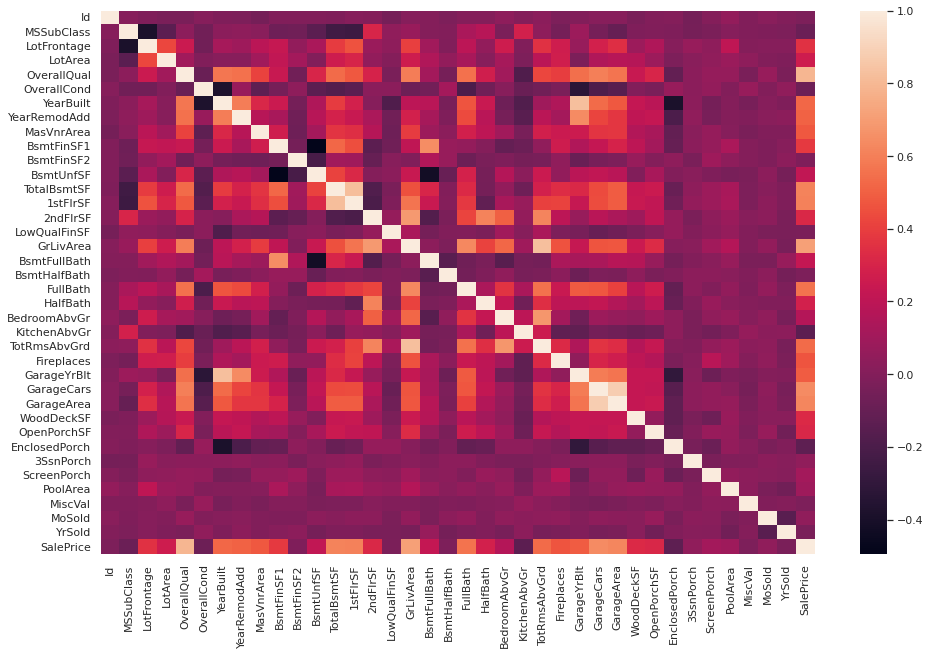

In [6]:
sns.heatmap(dataset.corr())

In [7]:
ft_nan = [ft for ft in dataset.columns if dataset[ft].isnull().sum()>1]
print(ft_nan)
print(len(ft_nan))

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
18


In [8]:
df_misval= pd.DataFrame([[ft,np.round(dataset[ft].isnull().mean()*100)] for ft in ft_nan], columns= ['Feature','%nan'])

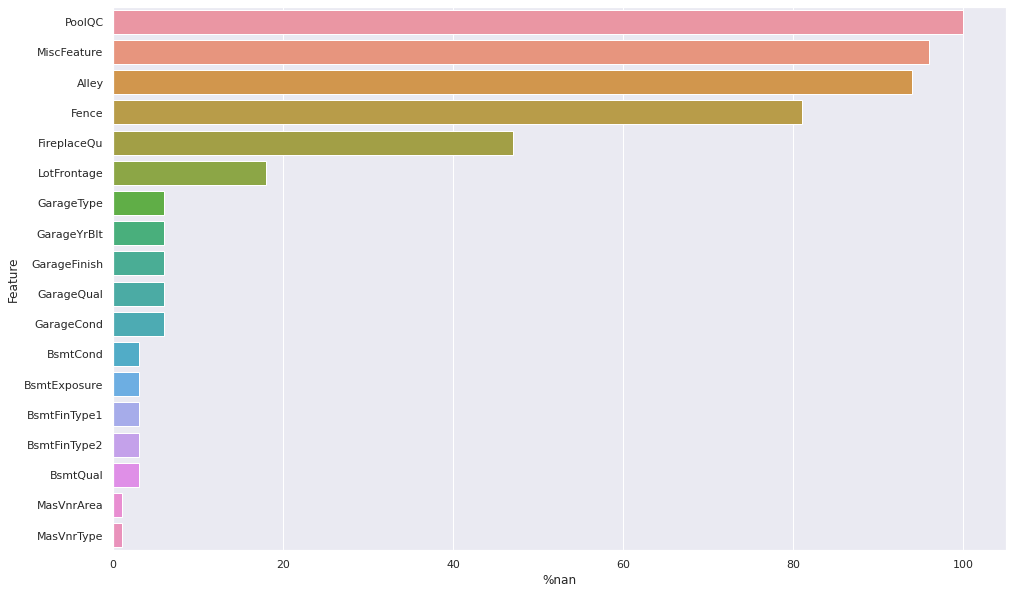

In [9]:
df_misval.sort_values(by= '%nan', ascending= False, inplace = True)
sns.barplot(x= '%nan', y='Feature', data= df_misval)

Find variation of median SalePrice wrt to missing values

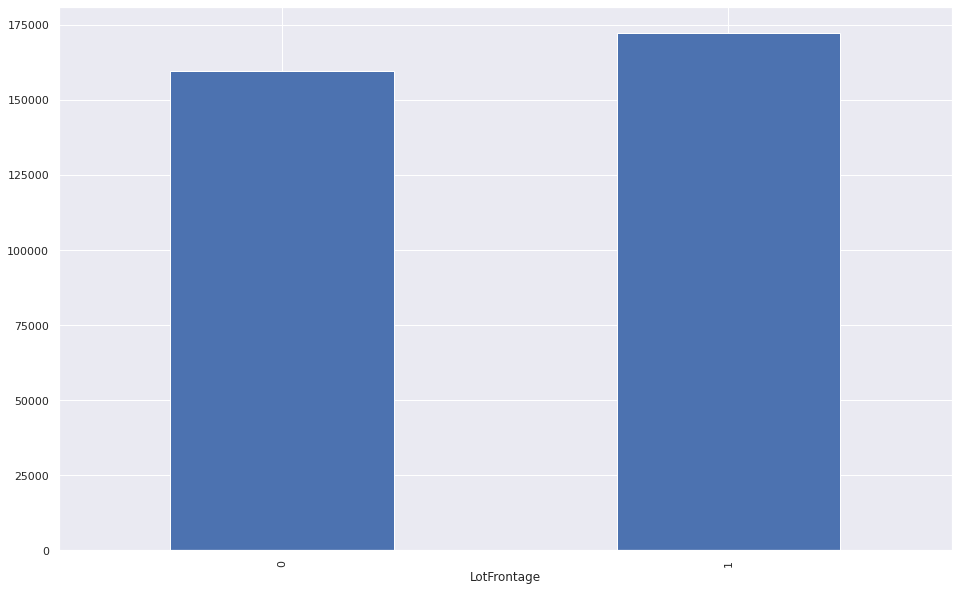

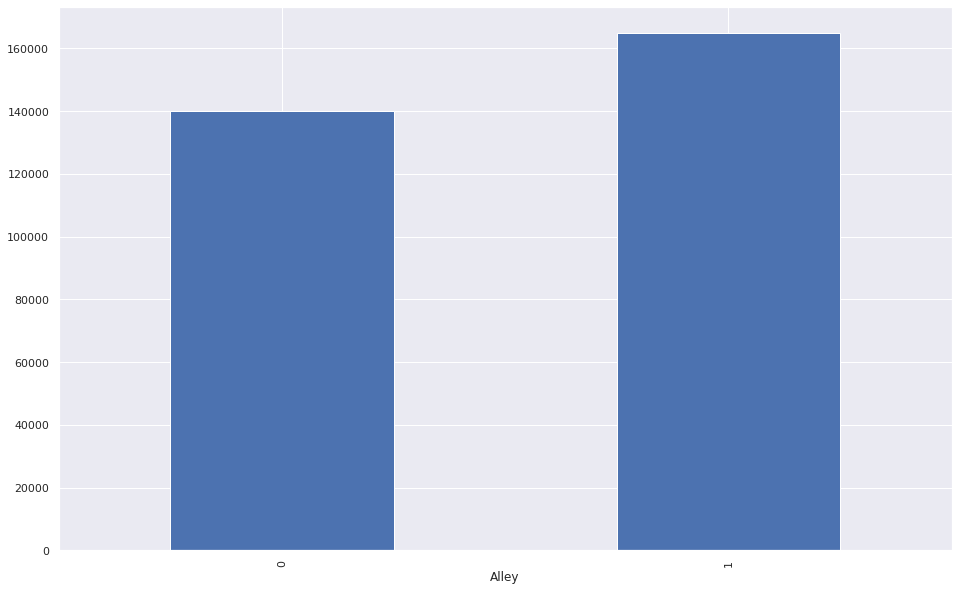

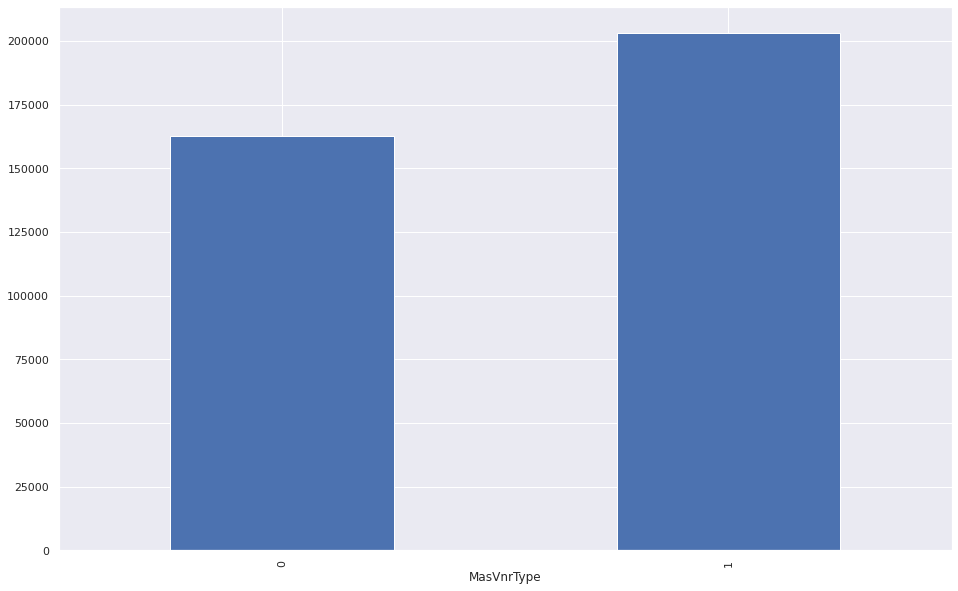

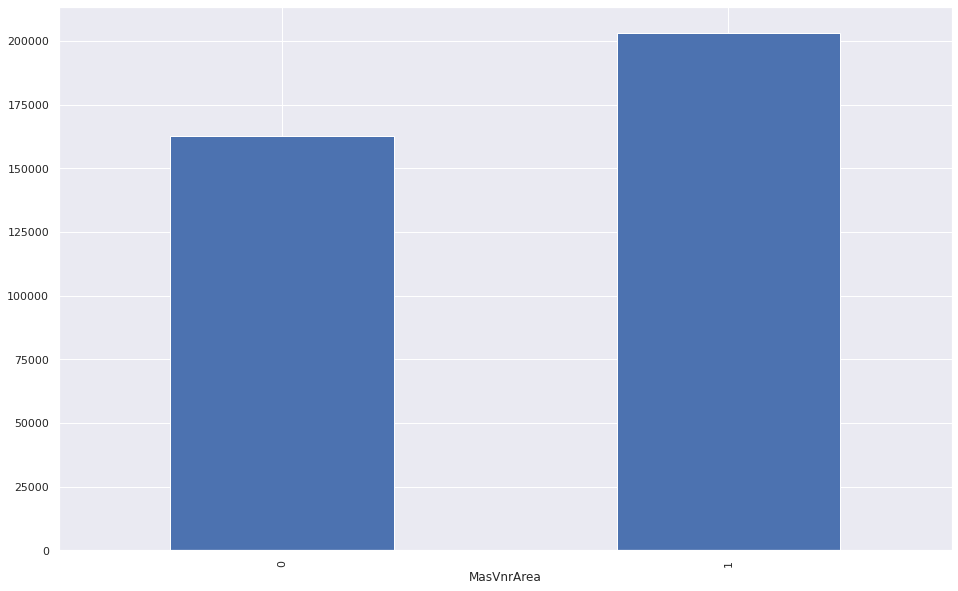

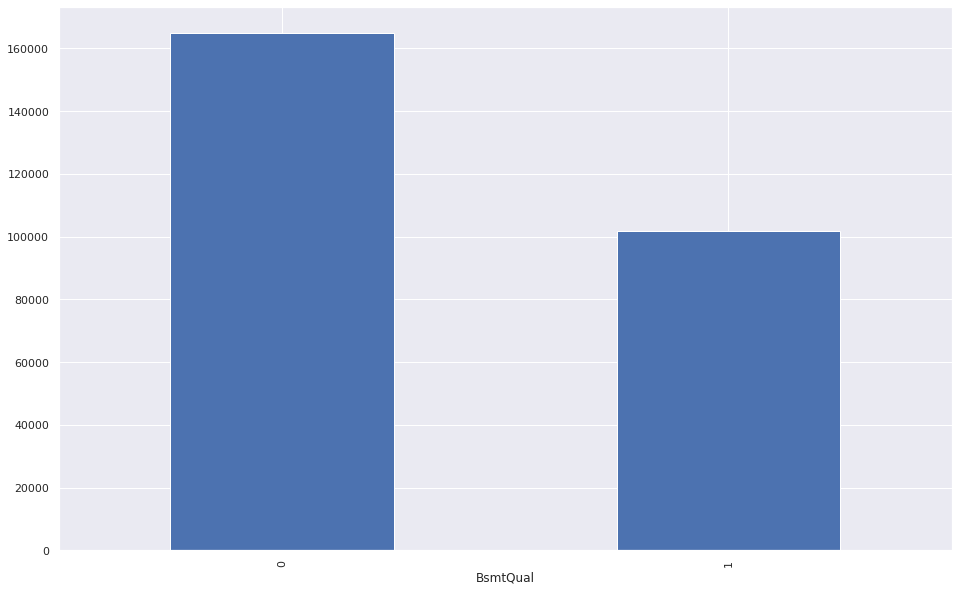

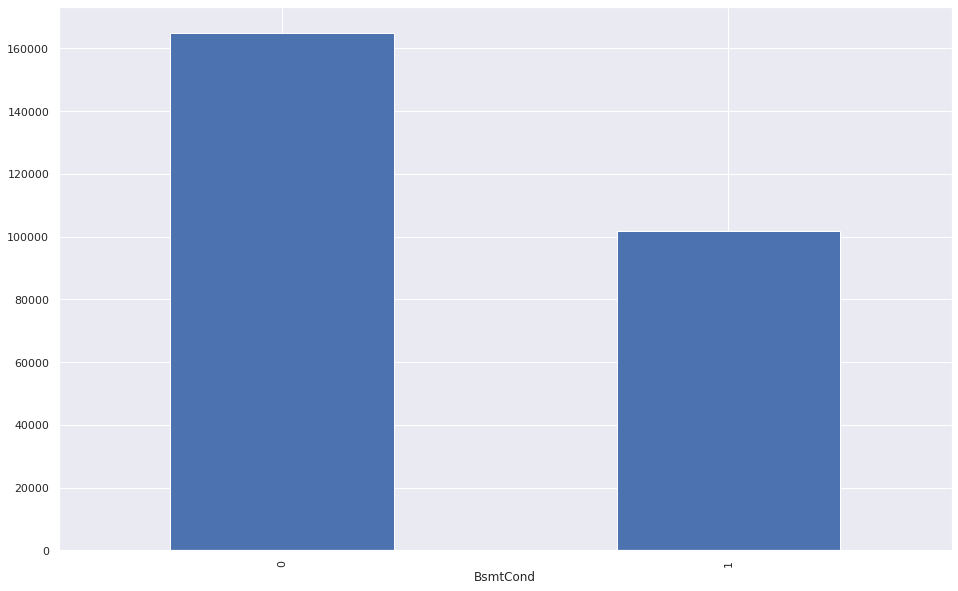

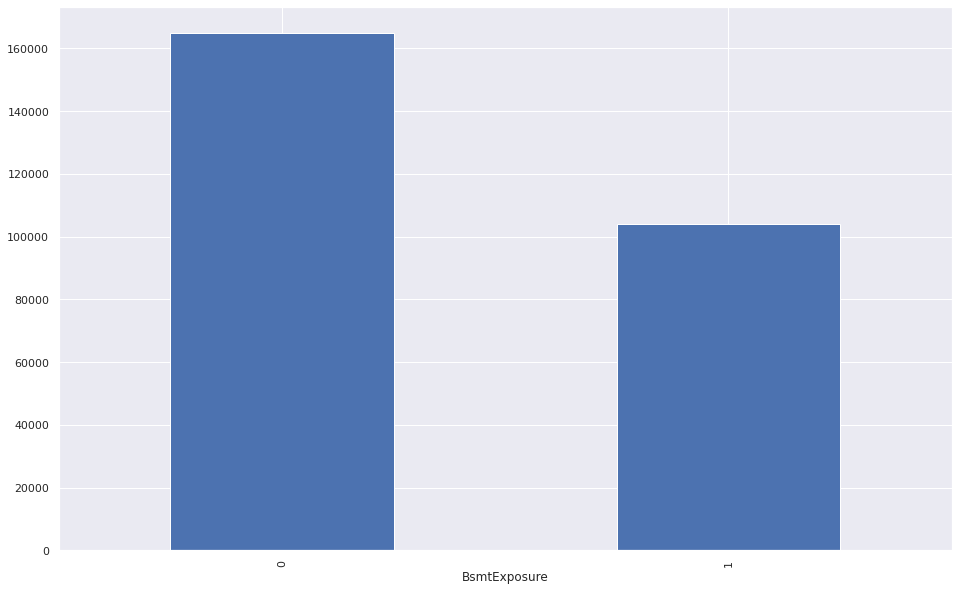

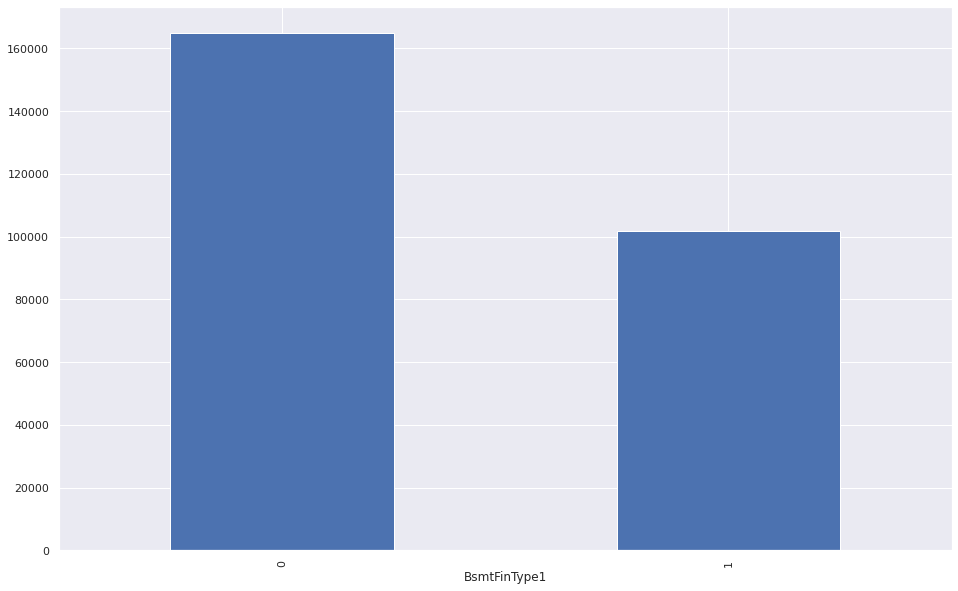

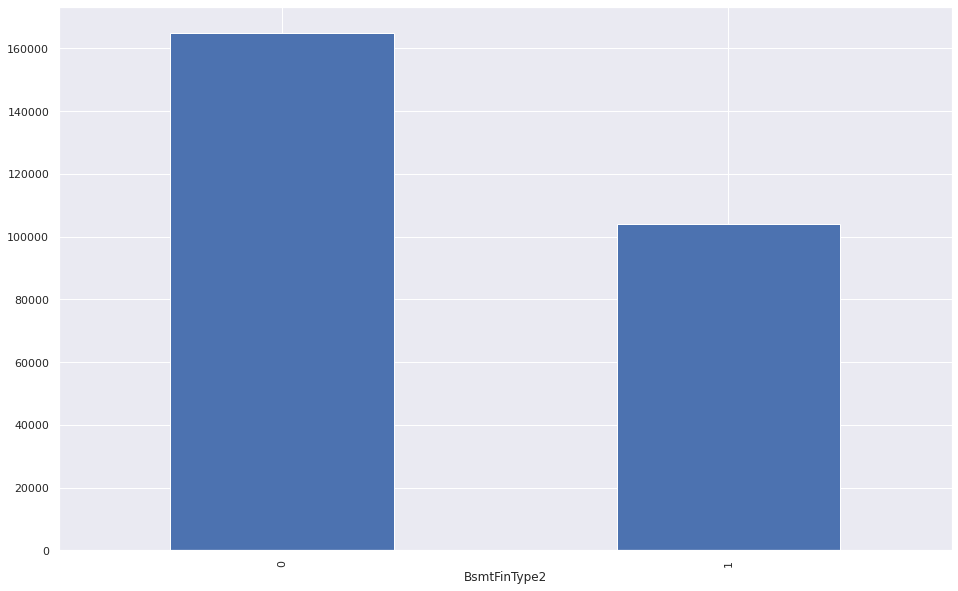

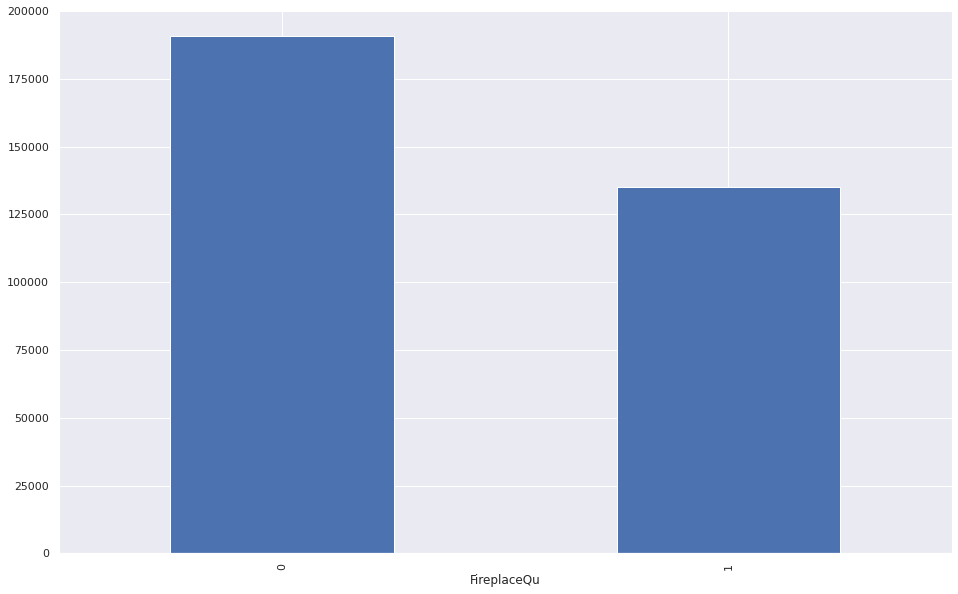

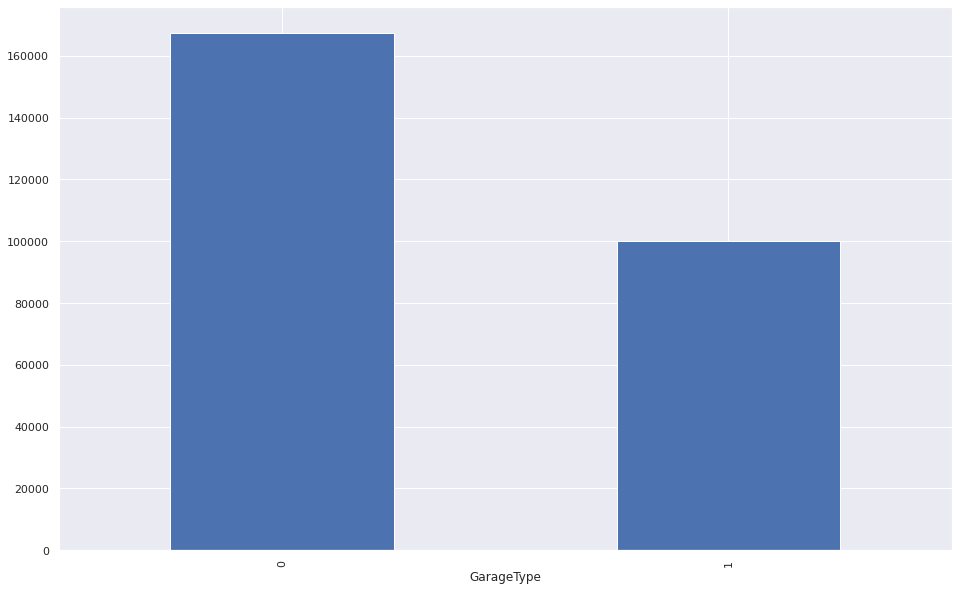

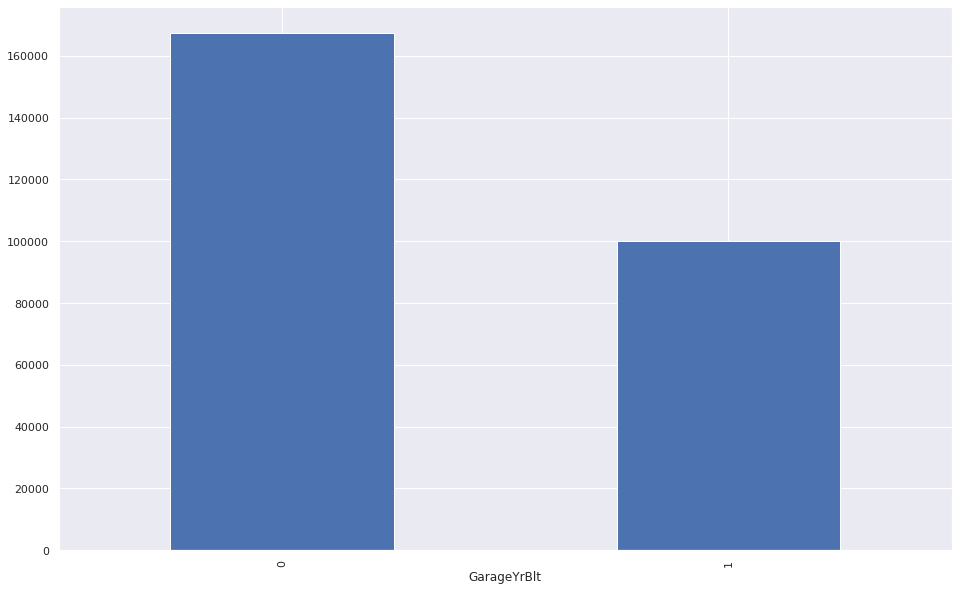

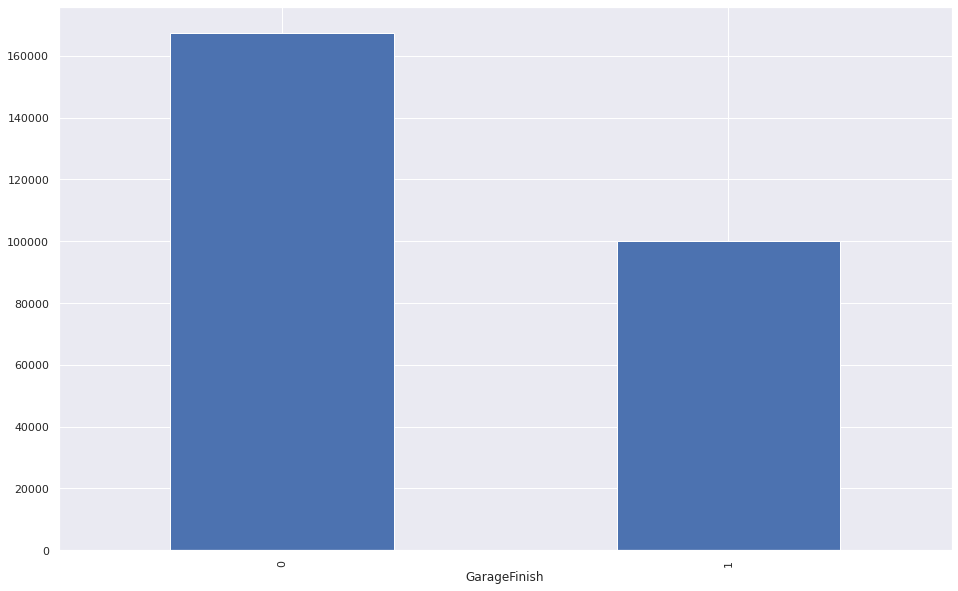

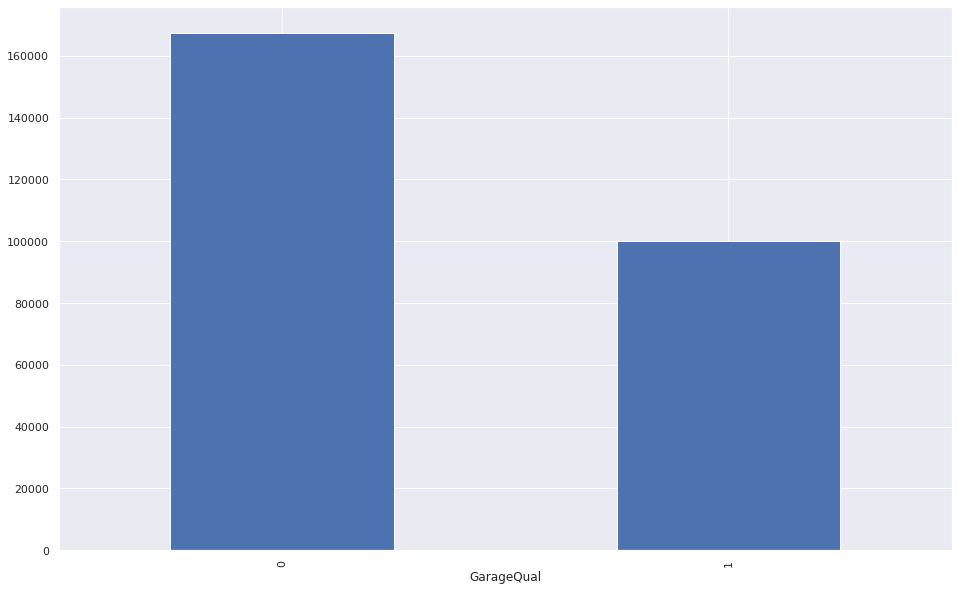

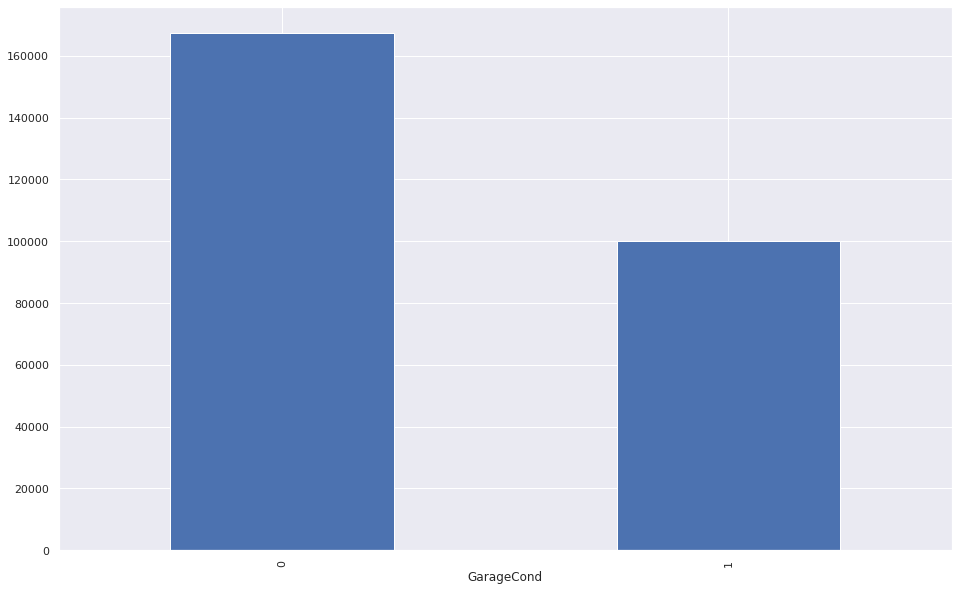

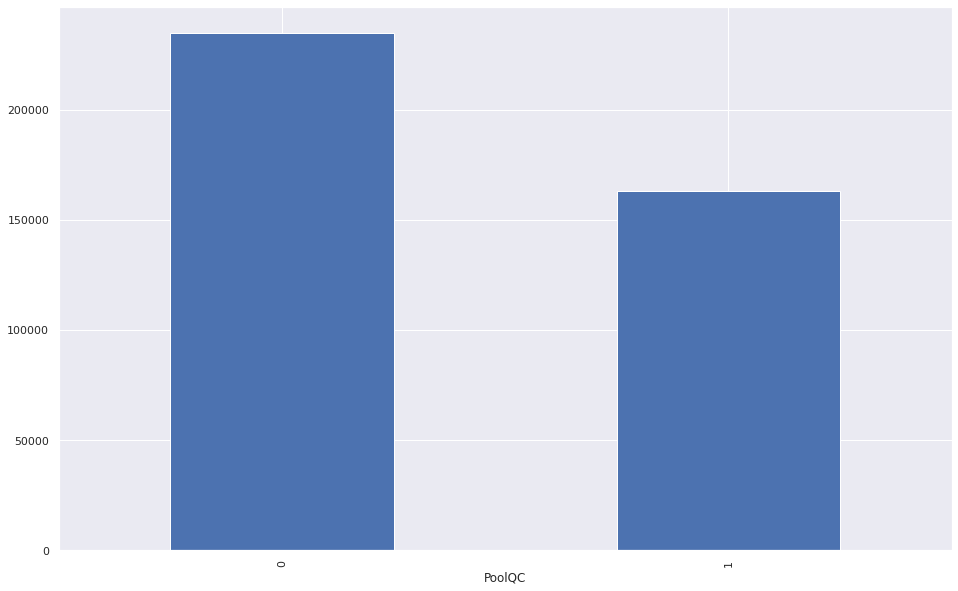

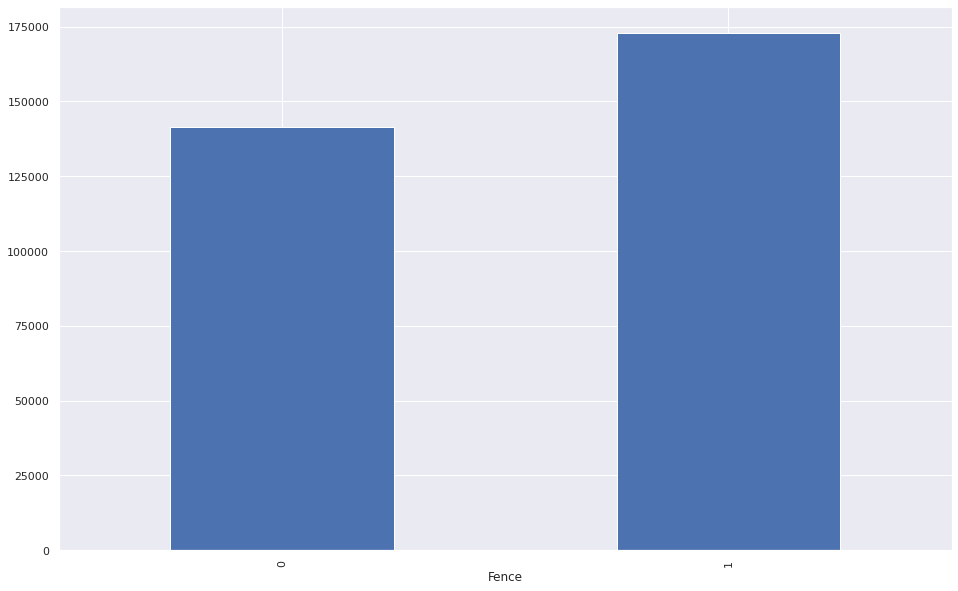

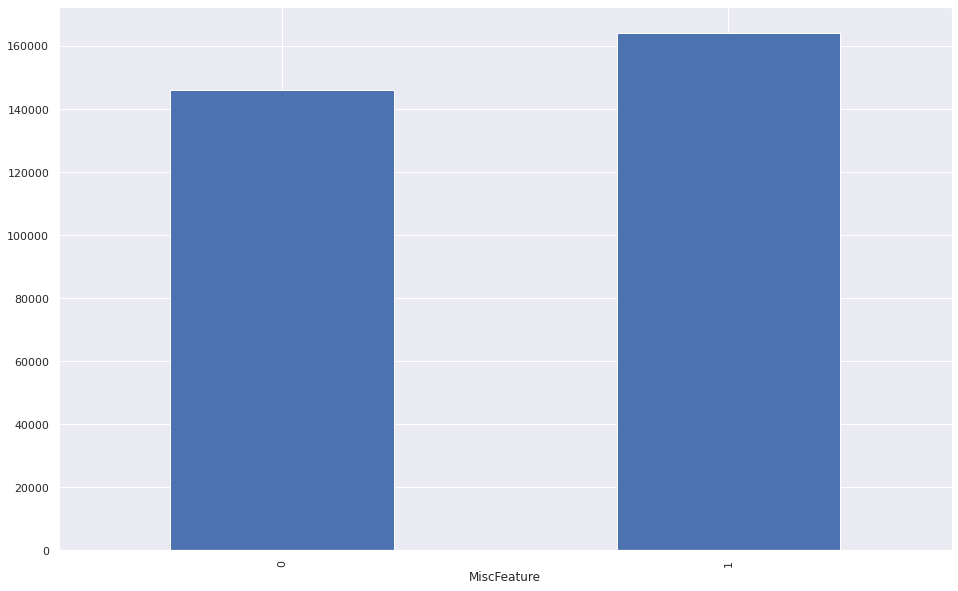

In [10]:
for ft in ft_nan:
  d_temp = dataset.copy()
  d_temp[ft]= np.where(d_temp[ft].isnull(),1,0)
  d_temp.groupby(ft)['SalePrice'].median().plot.bar()
  plt.show()

## Temporal Features

In [11]:
temporal_ft= [ft for ft in dataset.columns if 'Yr' in ft or 'Year' in ft]
temporal_ft

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
for ft in temporal_ft:
  print(ft,'-Dtype:',dataset[ft].dtype,', Newest:',dataset[ft].max(),', Oldest:',dataset[ft].min())

YearBuilt -Dtype: int64 , Newest: 2010 , Oldest: 1872
YearRemodAdd -Dtype: int64 , Newest: 2010 , Oldest: 1950
GarageYrBlt -Dtype: float64 , Newest: 2010.0 , Oldest: 1900.0
YrSold -Dtype: int64 , Newest: 2010 , Oldest: 2006


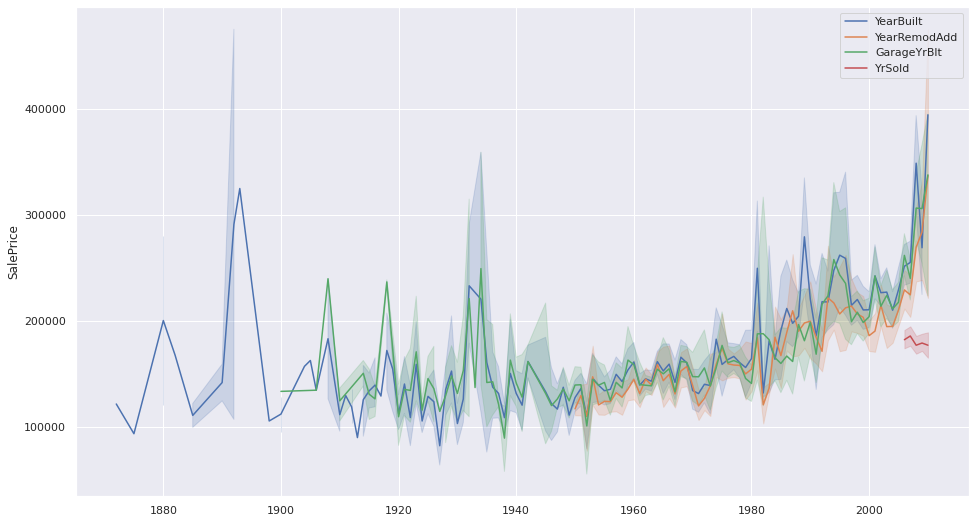

In [13]:
plt.rcParams['figure.figsize']= (16,9)
tftemp = temporal_ft.copy()
tftemp.append('SalePrice')
d_temp = dataset[tftemp]
for ft in temporal_ft:
  sns.lineplot(x= d_temp[ft], y=d_temp['SalePrice'], data= d_temp)
  plt.xlabel("")
plt.legend(temporal_ft)

Analyze SalePrice wrt duration between feature and YrSold 

In [14]:
d_temp = dataset.copy()
d_temp = d_temp[tftemp]
for ft in d_temp.columns:
  if ft!= 'YrSold' and ft!= 'SalePrice': d_temp[ft]= d_temp['YrSold']-d_temp[ft]

d_temp.drop('YrSold', axis= 1, inplace= True)

Text(0.5, 1.0, 'Variation of Sale Price with age of house, factoring recent modification')

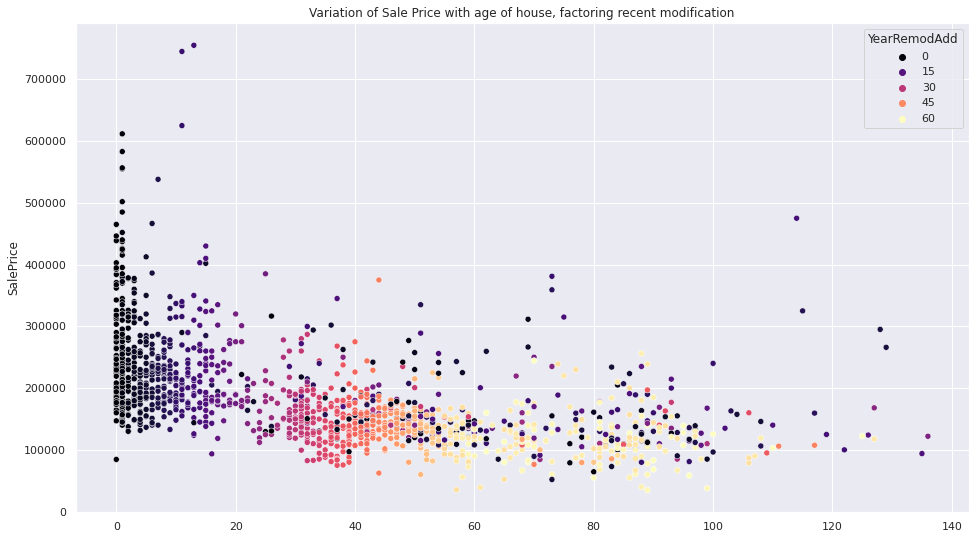

In [15]:
sns.scatterplot(data= d_temp, x= d_temp['YearBuilt'], y= d_temp['SalePrice'], hue= d_temp['YearRemodAdd'], palette= "magma")
  
plt.xlabel("")
plt.title("Variation of Sale Price with age of house, factoring recent modification")

Text(0.5, 1.0, 'Variation of Sale Price with age of house, factoring Garage built recently')

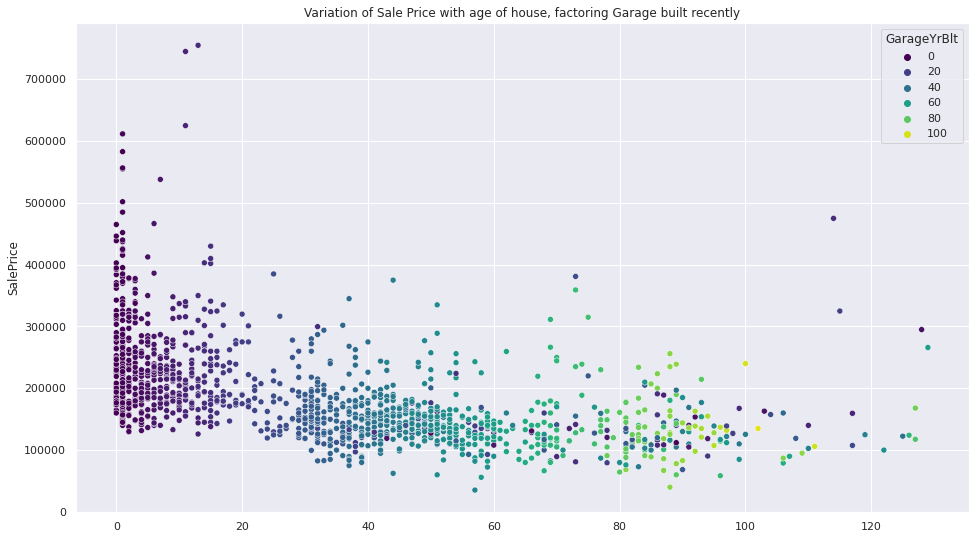

In [16]:
sns.scatterplot(data= d_temp, x= d_temp['YearBuilt'], y= d_temp['SalePrice'], hue= d_temp['GarageYrBlt'], palette= "viridis")
  
plt.xlabel("")
plt.title("Variation of Sale Price with age of house, factoring Garage built recently")

## Discrete and Continuous features:

In [17]:
ft_discrete= [ft for ft in dataset.columns if len(dataset[ft].unique())< 25 and ft!= 'Id' 
              and dataset[ft].dtype!= 'O' and ft not in temporal_ft]
print(ft_discrete)
print('Number of discrete features=',len(ft_discrete))

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
Number of discrete features= 17


In [18]:
ft_cont= [ft for ft in dataset.columns if not ft in ft_discrete and ft!='Id' 
          and dataset[ft].dtype!= 'O' and ft not in temporal_ft]
print(ft_cont)
print('Number of continuous features=',len(ft_cont))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Number of continuous features= 16


Visualisations:

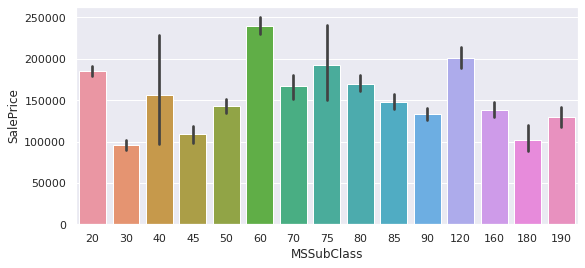

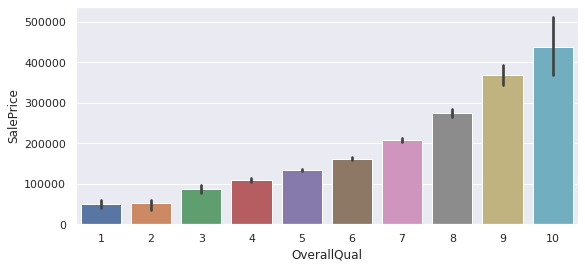

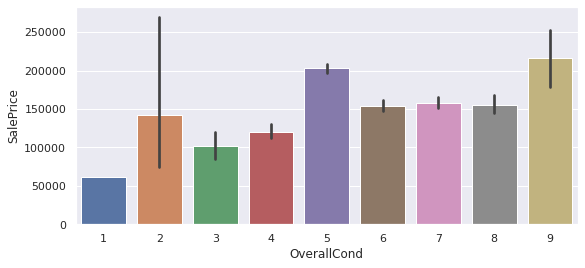

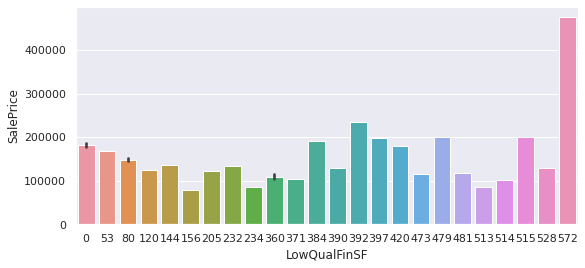

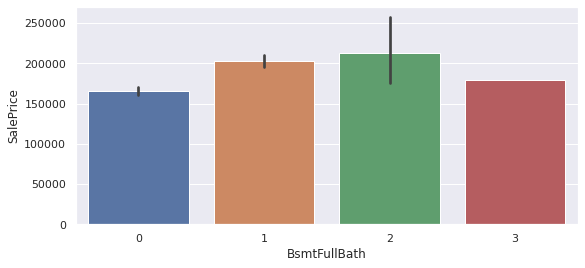

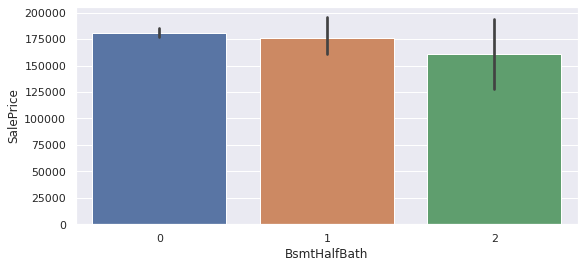

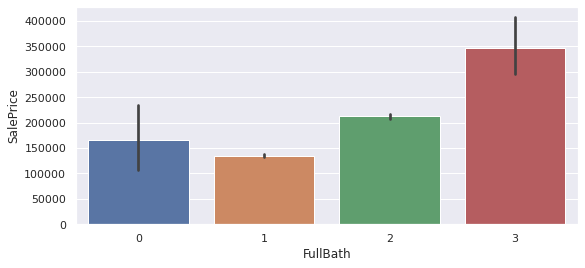

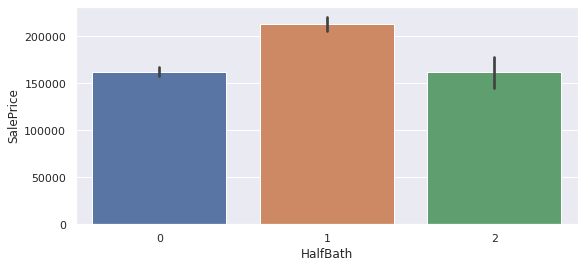

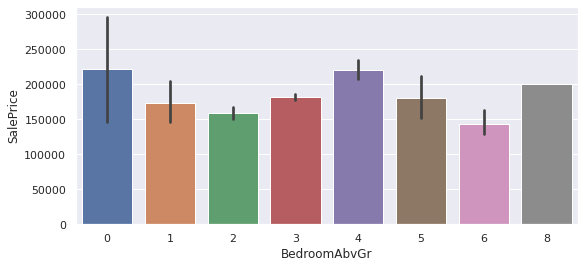

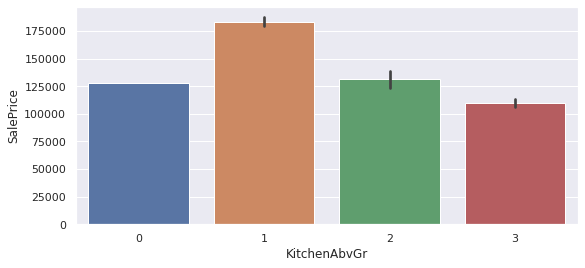

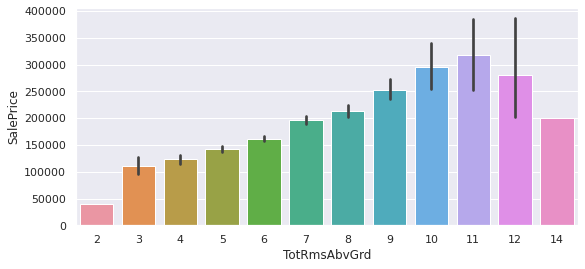

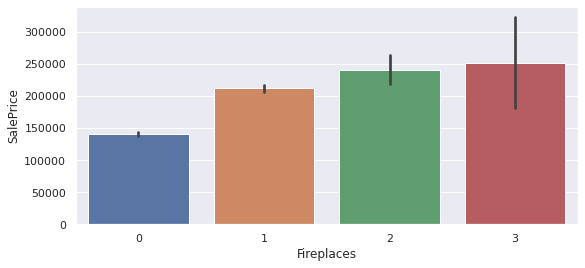

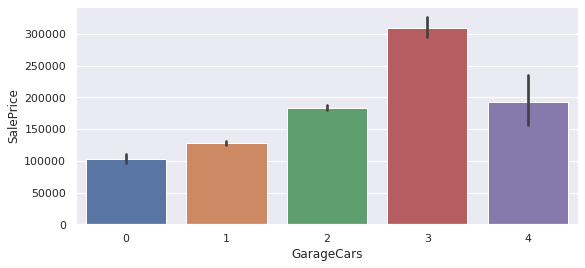

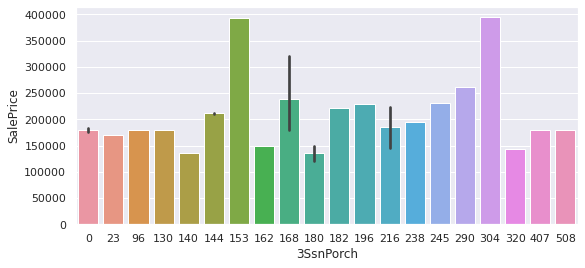

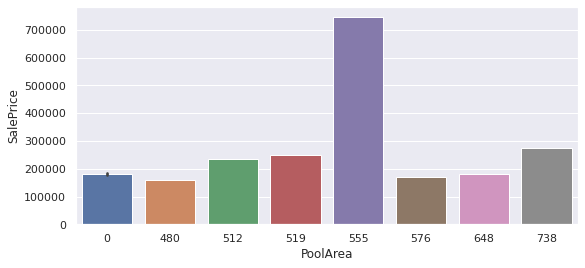

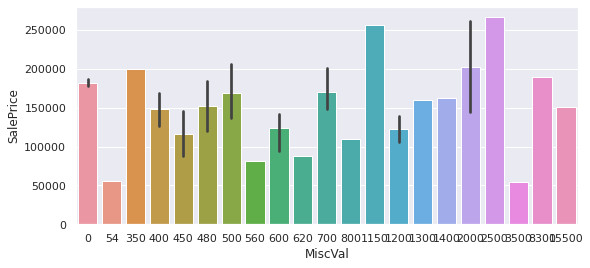

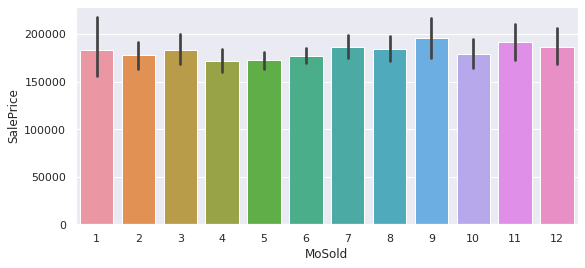

In [19]:
plt.rcParams['figure.figsize']=(9,4)
for ft in ft_discrete:
  sns.barplot(data= dataset, x= dataset[ft], y= dataset['SalePrice'])
  plt.show()

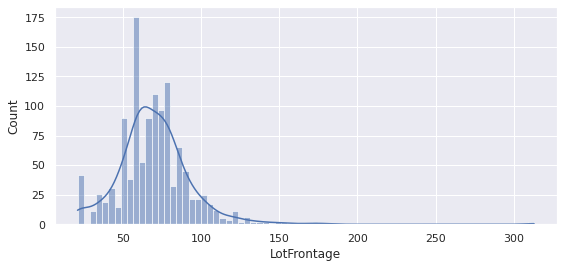

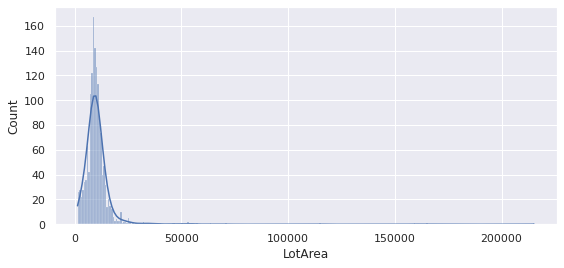

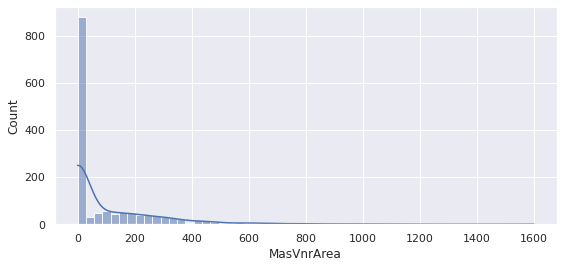

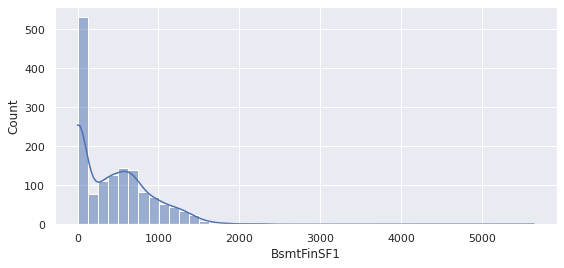

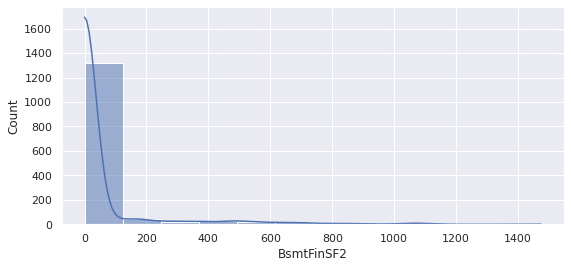

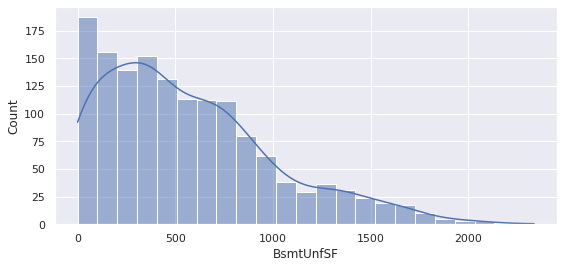

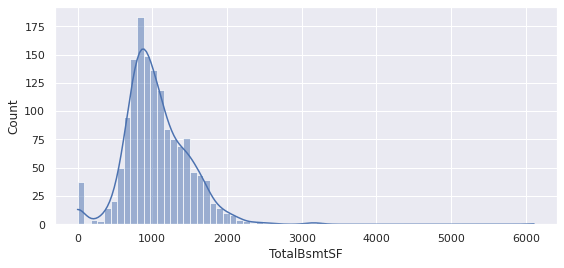

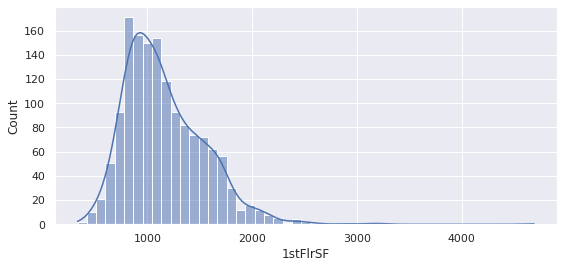

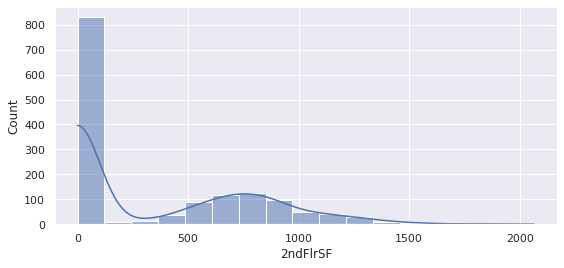

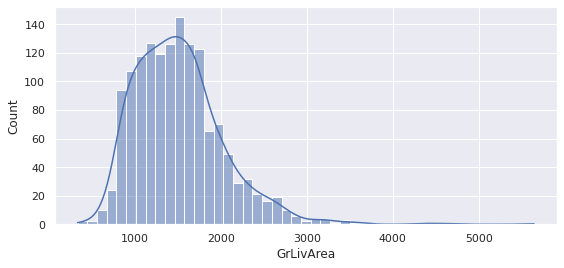

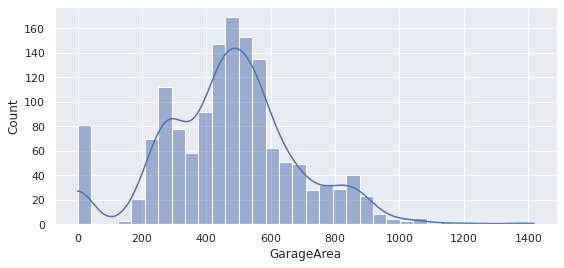

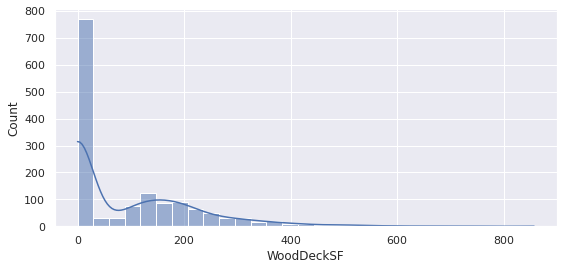

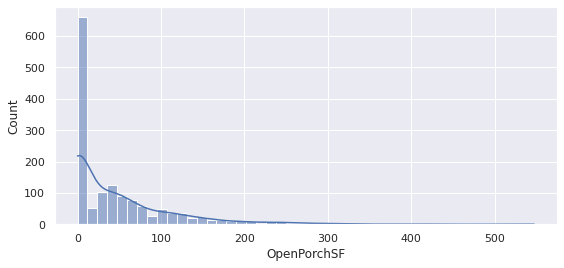

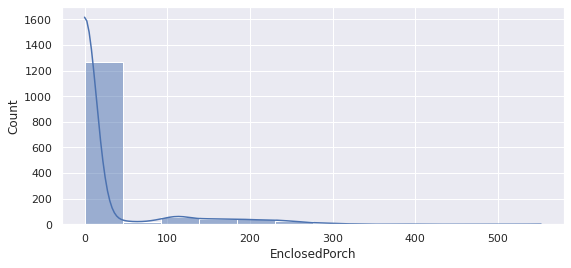

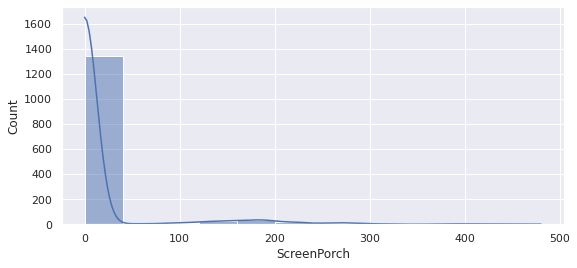

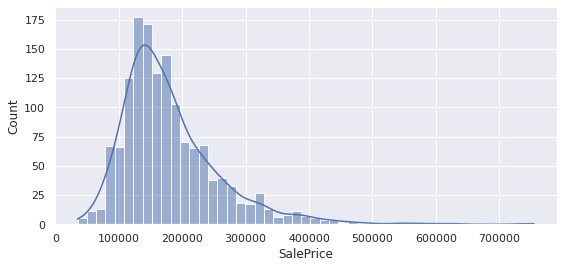

In [20]:
for ft in ft_cont:
  sns.histplot(dataset[ft], kde= True)
  plt.show()

Log normal transformation of continuous features:

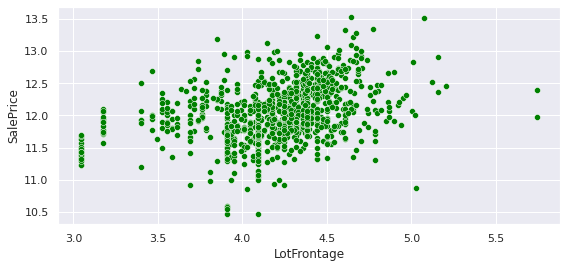

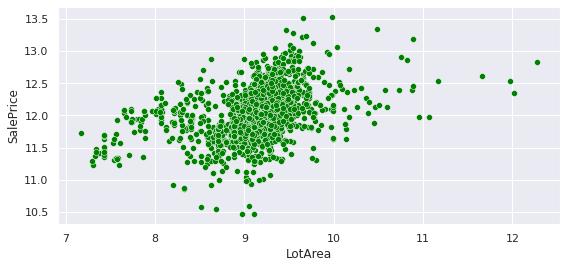

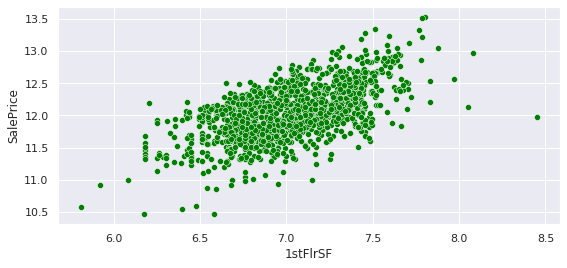

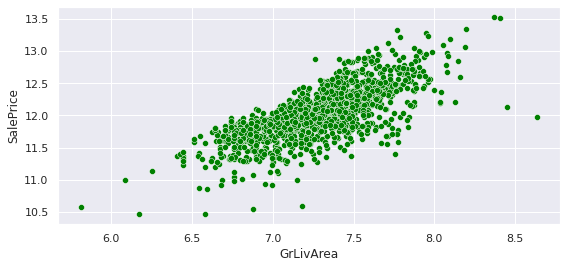

In [21]:
for ft in ft_cont:
  d_temp= dataset.copy()
  if not 0 in d_temp[ft].unique() and ft!= 'SalePrice':
    d_temp[ft]= np.log(d_temp[ft])
    d_temp['SalePrice']= np.log(d_temp['SalePrice'])
    sns.scatterplot(x= d_temp[ft], y= d_temp['SalePrice'], color= 'green')
    plt.show()

### Outliers

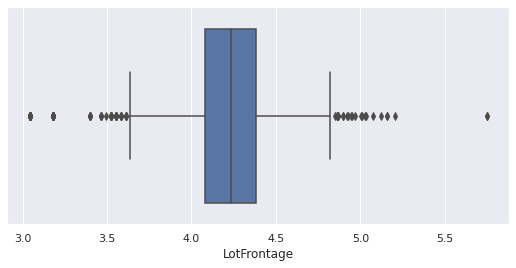

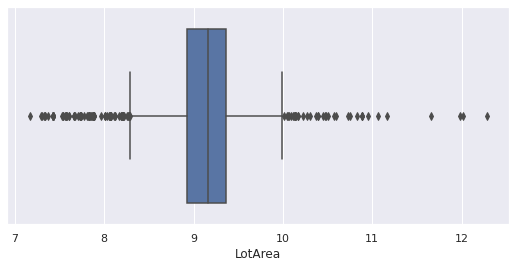

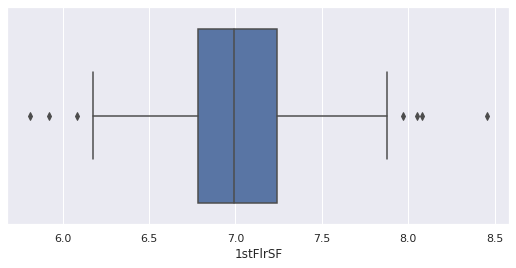

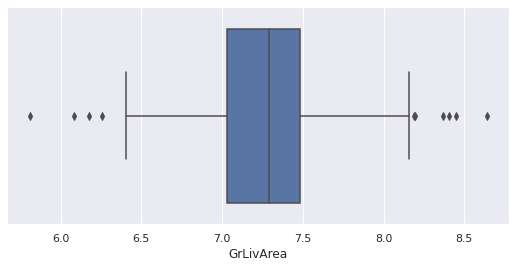

In [22]:
for ft in ft_cont:
  d_temp= dataset.copy()
  if not 0 in d_temp[ft].unique() and ft!= 'SalePrice':
    d_temp[ft]= np.log(d_temp[ft])
    sns.boxplot(x= d_temp[ft])
    plt.show()

## Categorical Features

In [23]:
ft_cat= [ft for ft in dataset.columns if dataset[ft].dtype== 'O' and ft not in temporal_ft]
print("Number of categorical features=",len(ft_cat))

Number of categorical features= 43


In [24]:
dataset[ft_cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [25]:
for ft in ft_cat:
  print(ft,'-\tNum categories =\t',len(dataset[ft].unique()))

MSZoning -	Num categories =	 5
Street -	Num categories =	 2
Alley -	Num categories =	 3
LotShape -	Num categories =	 4
LandContour -	Num categories =	 4
Utilities -	Num categories =	 2
LotConfig -	Num categories =	 5
LandSlope -	Num categories =	 3
Neighborhood -	Num categories =	 25
Condition1 -	Num categories =	 9
Condition2 -	Num categories =	 8
BldgType -	Num categories =	 5
HouseStyle -	Num categories =	 8
RoofStyle -	Num categories =	 6
RoofMatl -	Num categories =	 8
Exterior1st -	Num categories =	 15
Exterior2nd -	Num categories =	 16
MasVnrType -	Num categories =	 5
ExterQual -	Num categories =	 4
ExterCond -	Num categories =	 5
Foundation -	Num categories =	 6
BsmtQual -	Num categories =	 5
BsmtCond -	Num categories =	 5
BsmtExposure -	Num categories =	 5
BsmtFinType1 -	Num categories =	 7
BsmtFinType2 -	Num categories =	 7
Heating -	Num categories =	 6
HeatingQC -	Num categories =	 5
CentralAir -	Num categories =	 2
Electrical -	Num categories =	 6
KitchenQual -	Num categorie

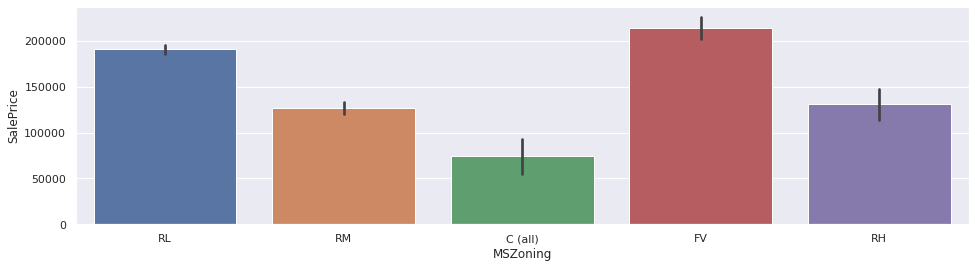

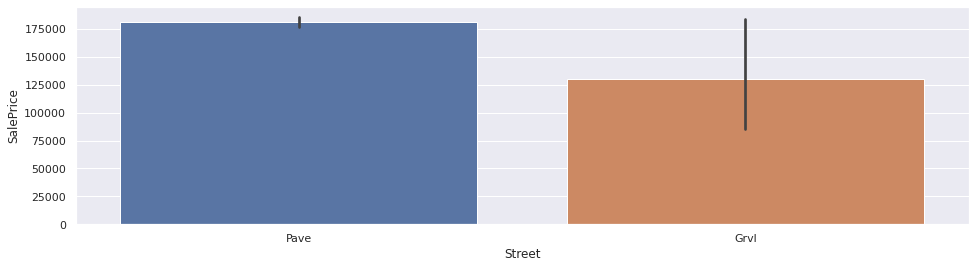

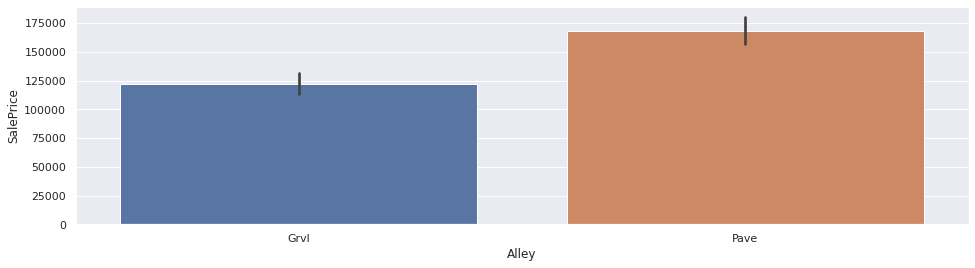

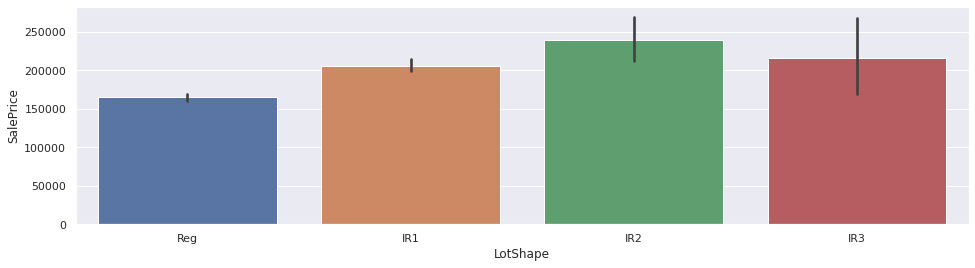

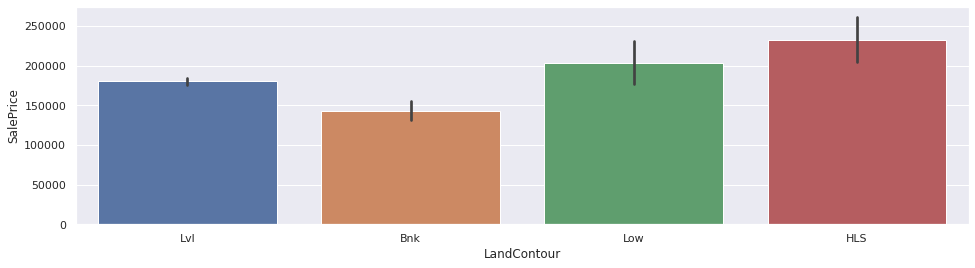

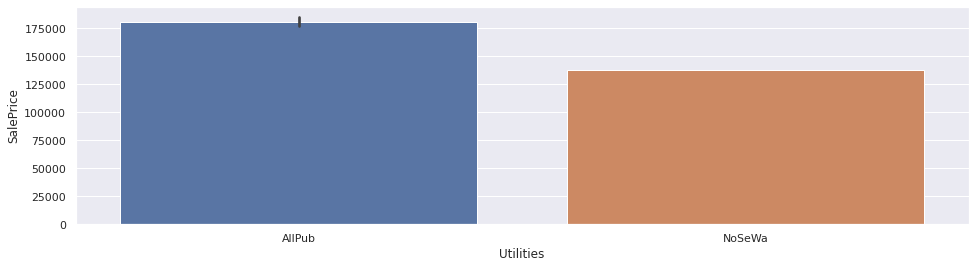

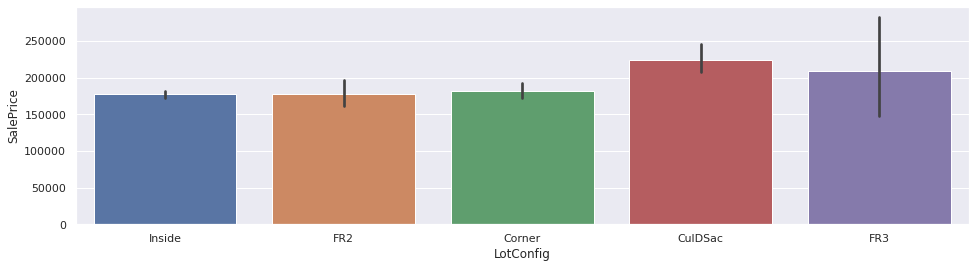

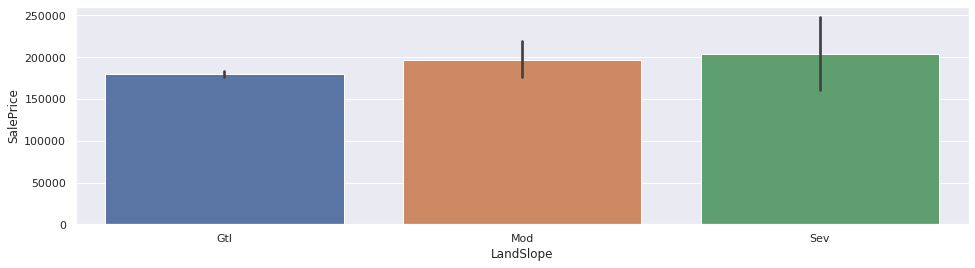

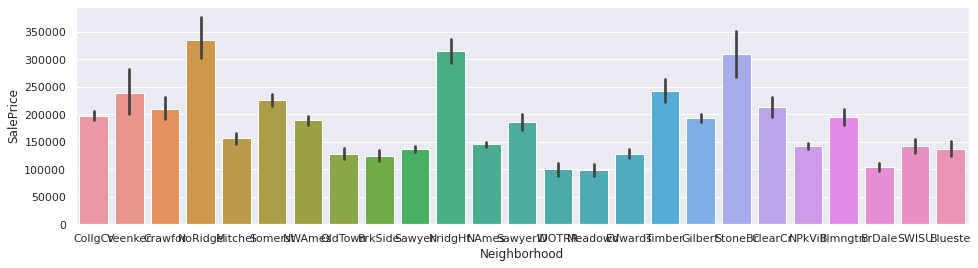

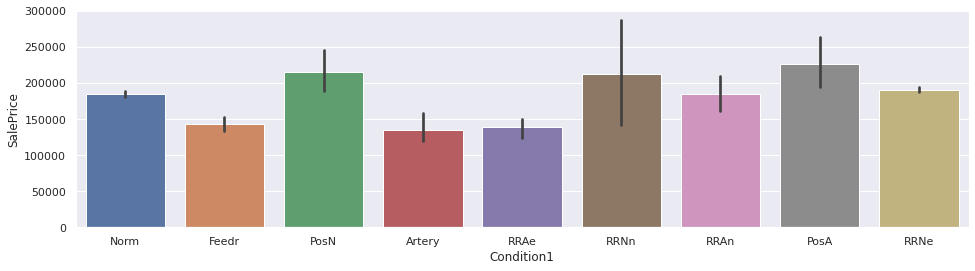

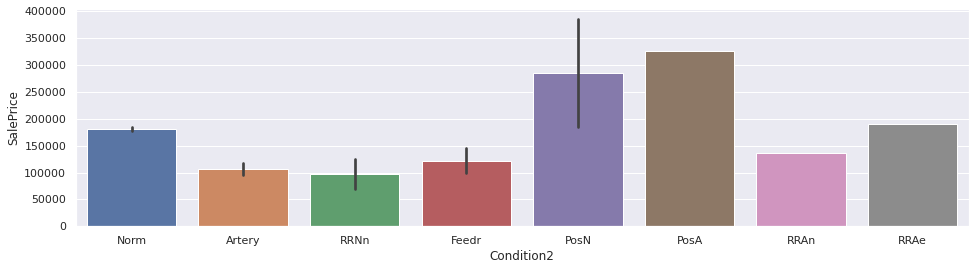

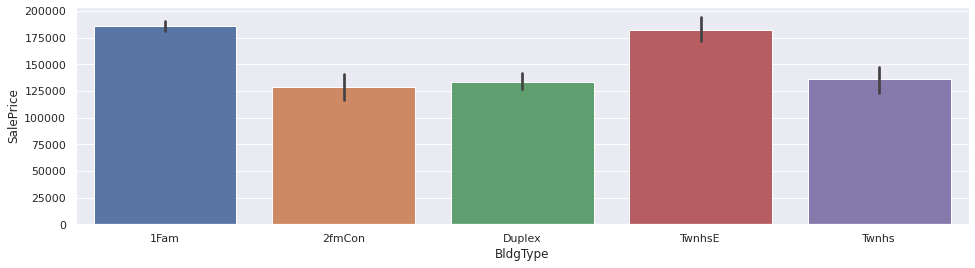

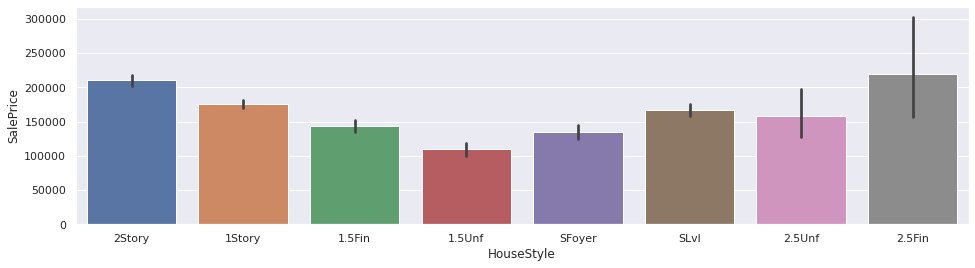

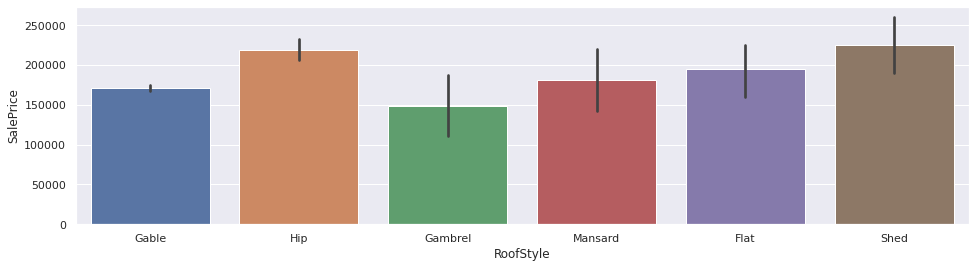

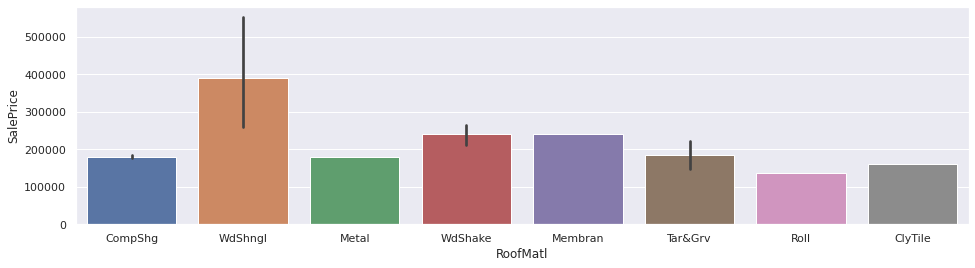

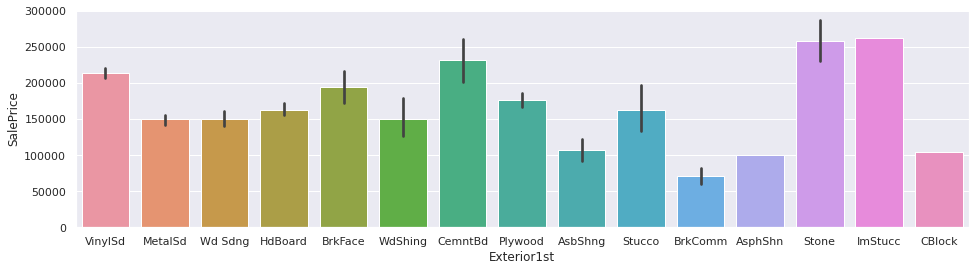

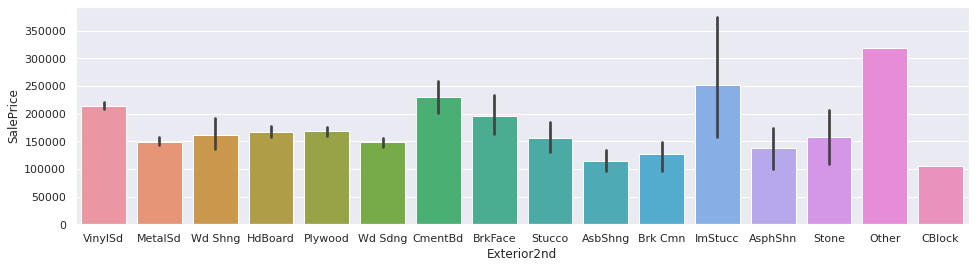

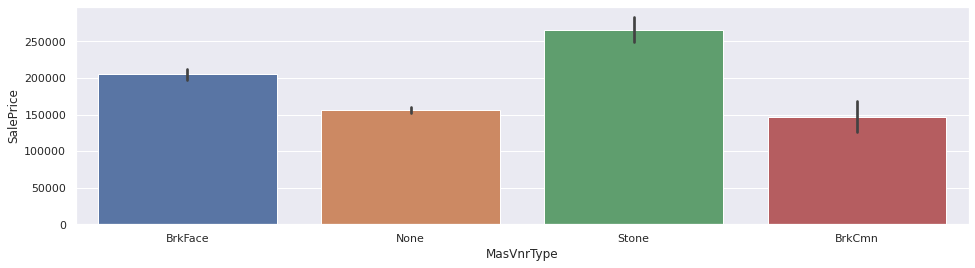

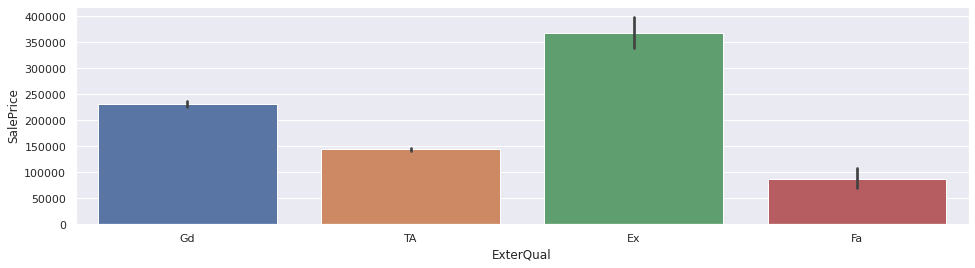

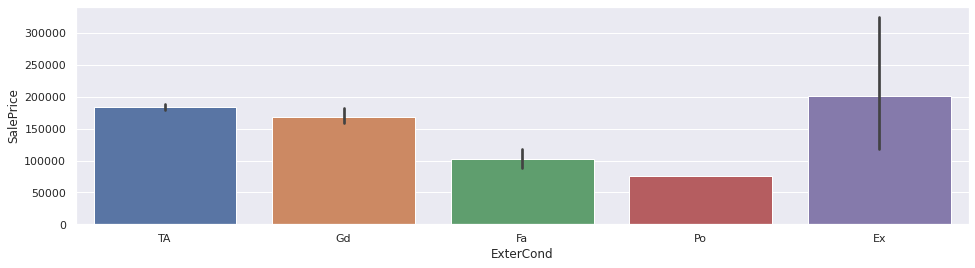

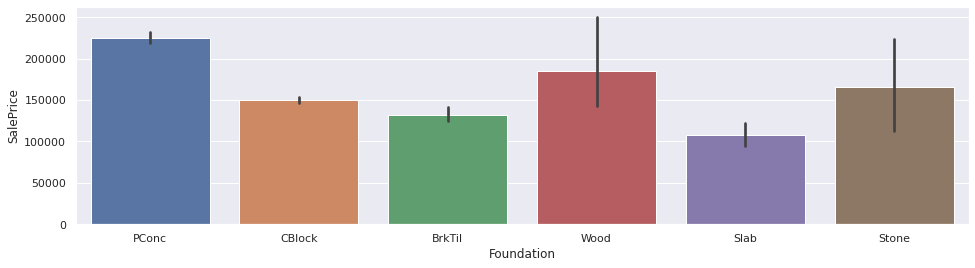

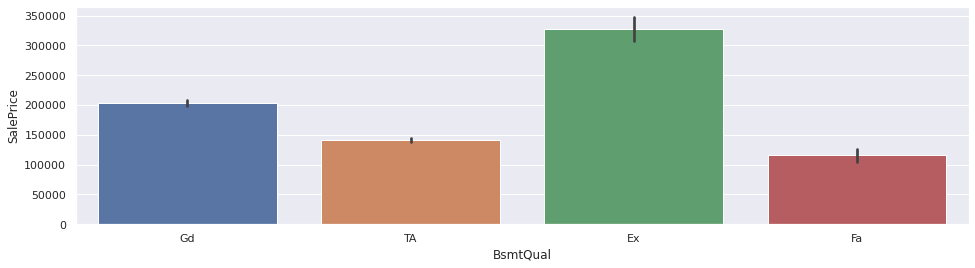

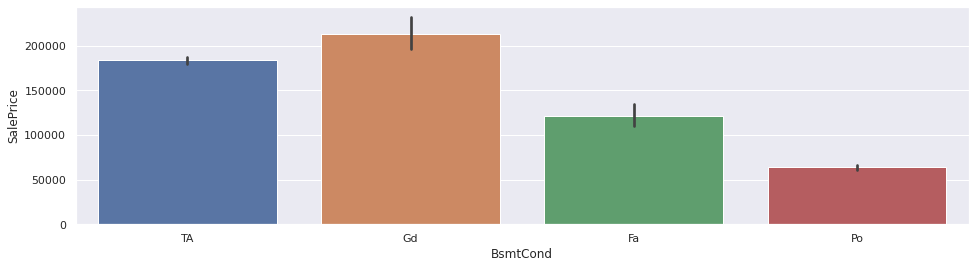

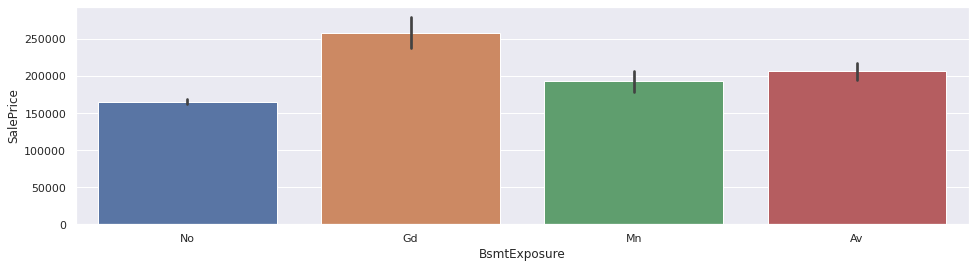

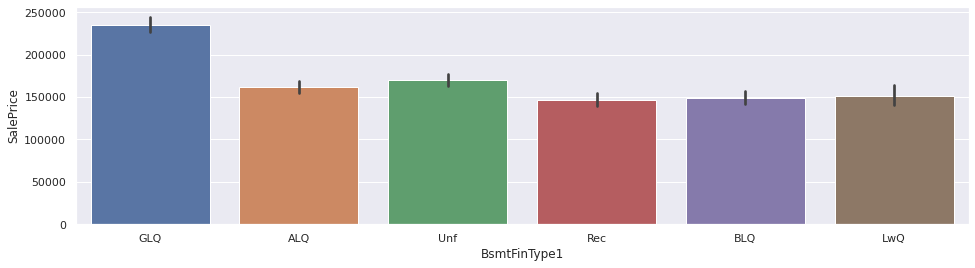

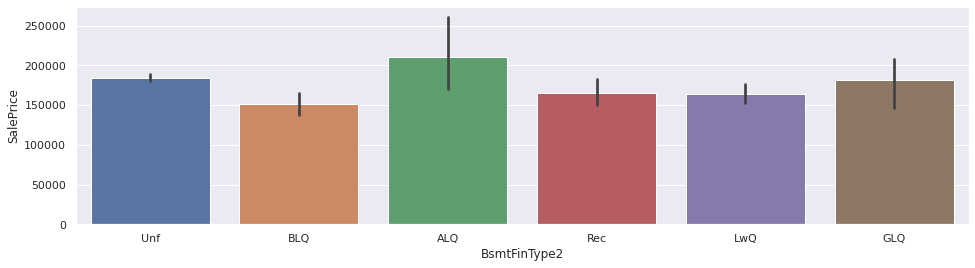

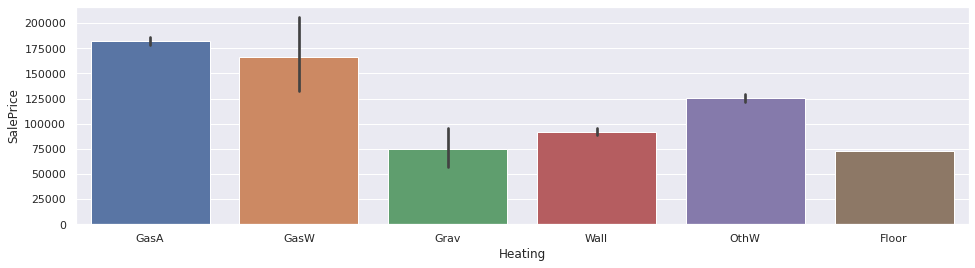

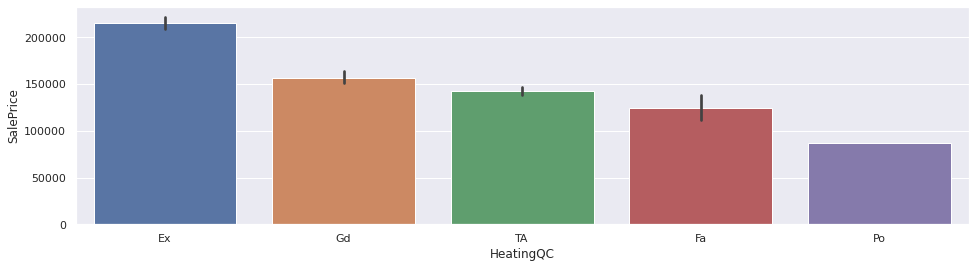

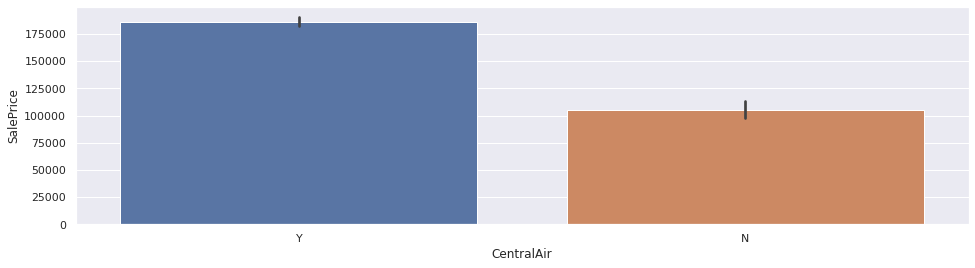

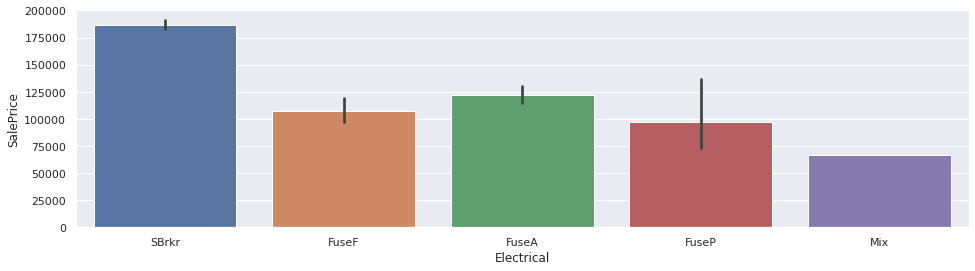

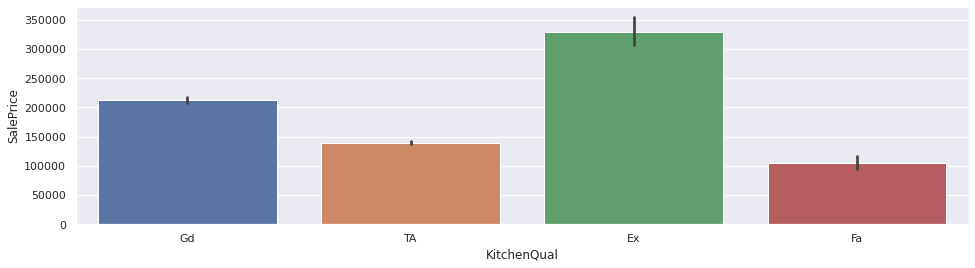

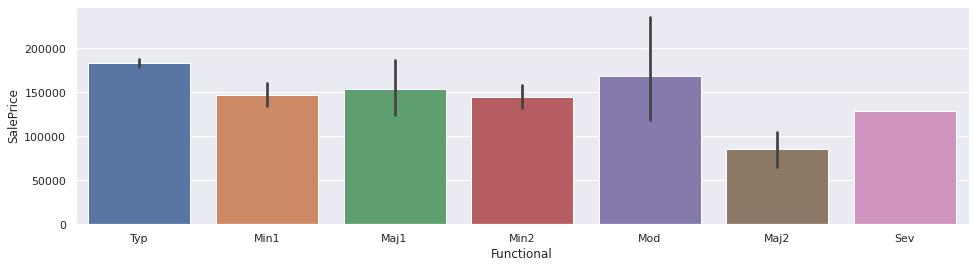

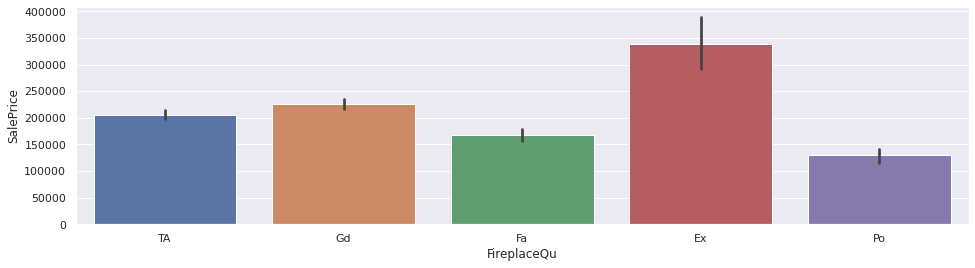

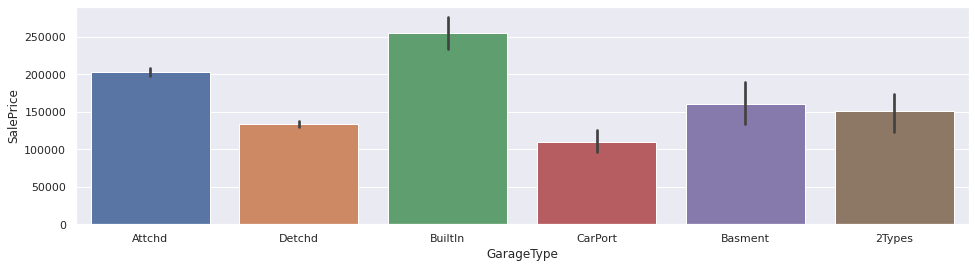

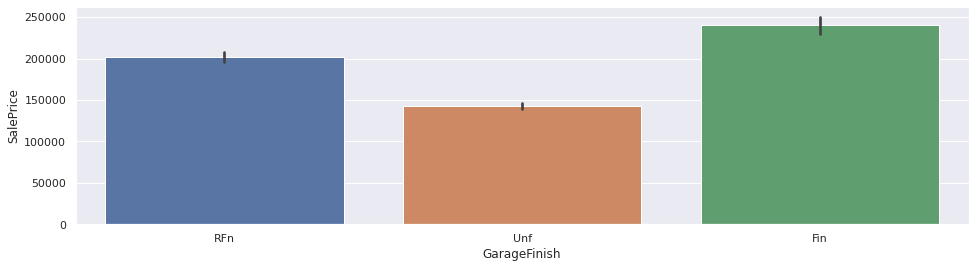

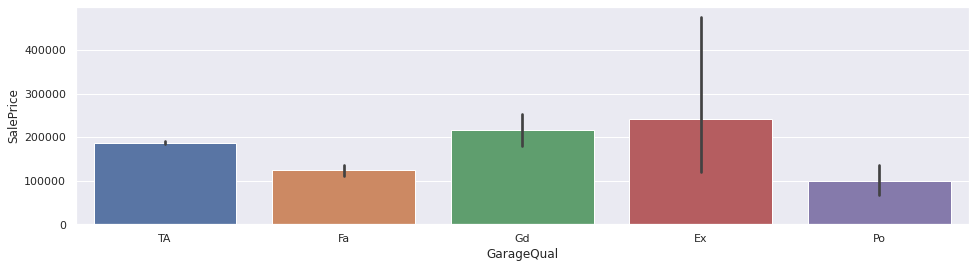

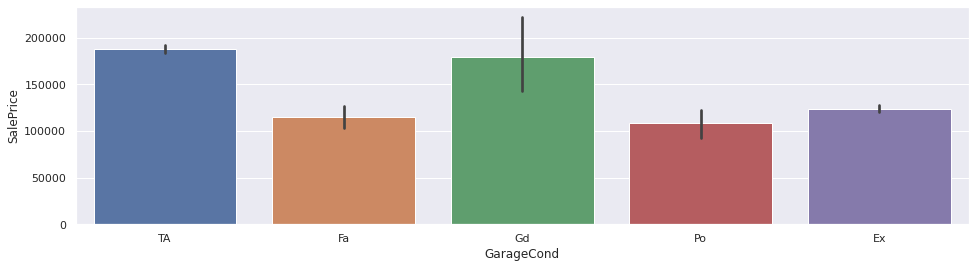

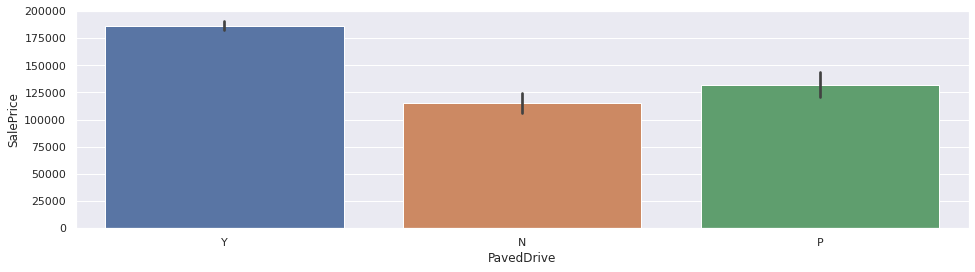

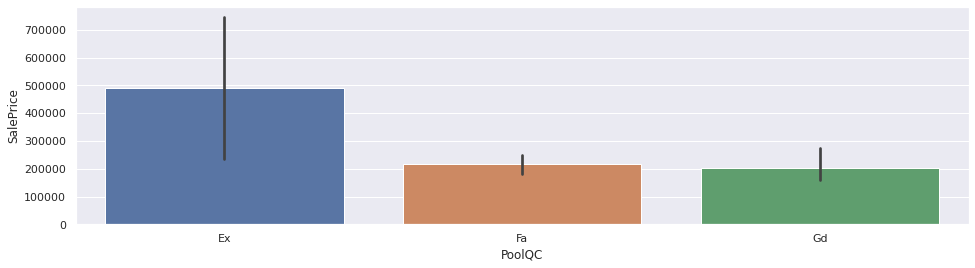

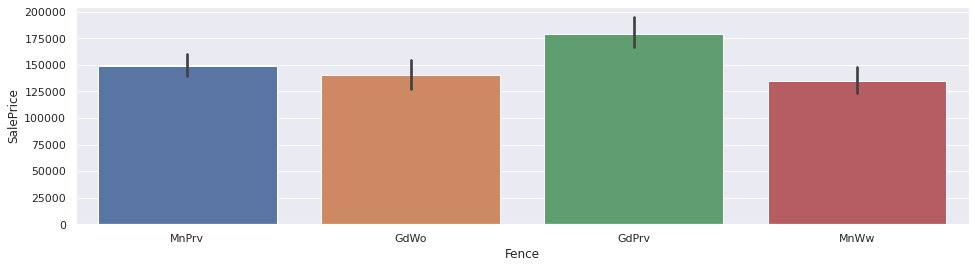

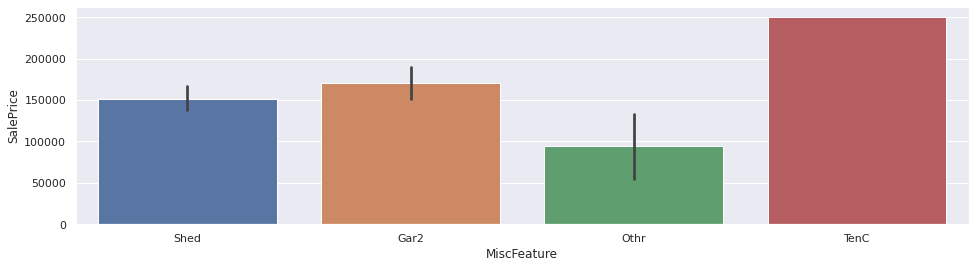

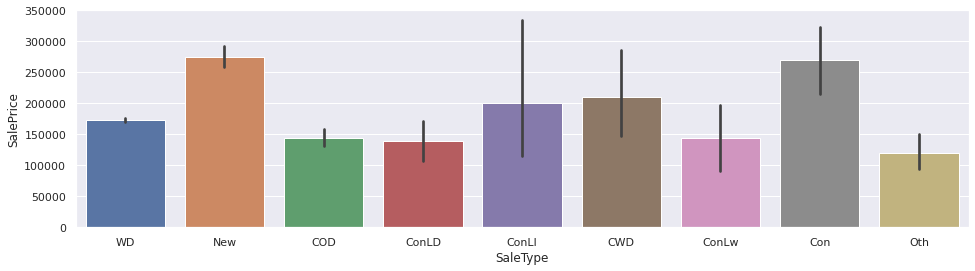

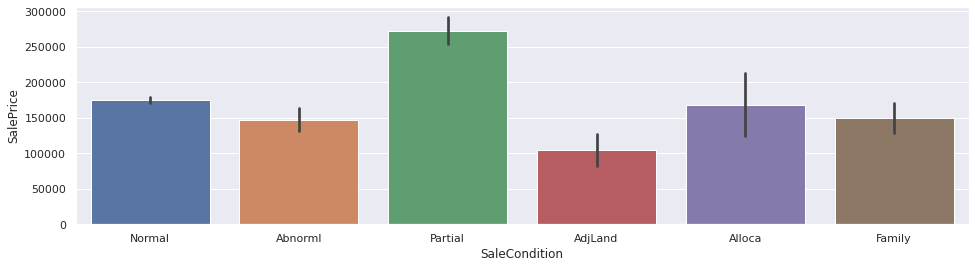

In [26]:
plt.rcParams['figure.figsize']=(16,4)
for ft in ft_cat:
  sns.barplot(x= dataset[ft], y=dataset['SalePrice'])
  plt.show()

# Feature Engineering

## Missing values

In [144]:
df_misval

,Feature,%nan
15,PoolQC,100.0
17,MiscFeature,96.0
1,Alley,94.0
16,Fence,81.0
9,FireplaceQu,47.0
0,LotFrontage,18.0
10,GarageType,6.0
11,GarageYrBlt,6.0
12,GarageFinish,6.0
13,GarageQual,6.0


In [145]:
ft_nan_c = [ft for ft in df_misval['Feature'] if dataset[ft].dtype== 'O']
ft_nan_n = [ft for ft in df_misval['Feature'] if not ft in ft_nan_c]

In [146]:
print('Categorical features with missing vals:\n',ft_nan_c)
print('Numerical features with missing vals:\n',ft_nan_n)

Categorical features with missing vals:
 ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'MasVnrType']
Numerical features with missing vals:
 ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


In [147]:
wdata= dataset.copy() #working data

### Replacing missing values

#### Categorical features

In [148]:
def replace_nan_c(wdata, ft_nan_c):
  d_temp= wdata.copy()
  d_temp[ft_nan_c]= d_temp[ft_nan_c].fillna('Missing')
  return d_temp

In [149]:
wdata= replace_nan_c(wdata, ft_nan_c)
wdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


#### Numerical features

In [150]:
#replacing with median due to outliers in data

for ft in ft_nan_n:
  med = wdata[ft].median()
  wdata[ft+'was_nan']= np.where(wdata[ft].isnull(),1,0) #for future reference
  wdata[ft]= wdata[ft].fillna(med)

## Temporals as duration/age

In [151]:
for ft in temporal_ft: #due to negative slope of yrsold vs saleprice
  if ft!='YrSold':
    wdata[ft]= wdata['YrSold']-wdata[ft]

## Rare categorical data

In [152]:
for ft in ft_cat:
  temp= wdata.groupby(ft)['SalePrice'].count()/len(wdata)
  d_temp= temp[temp>0.1].index
  wdata[ft]= np.where(wdata[ft].isin(d_temp), wdata[ft], 'rare_val')

## Log normal transformation

In [153]:
ft_num = [ft for ft in ft_cont if wdata[ft].dtype!= 'O' and ft not in
          ['Id','LotFrontagewas_nan','GarageYrBltwas_nan','MasVnrAreawas_nan']
          and 0 not in wdata[ft].unique()
          and ft not in temporal_ft]

In [154]:
for ft in ft_num:
  wdata[ft]= np.log(wdata[ft])

## Encoding categorical data

In [155]:
for ft in ft_cat:
  tlist= wdata.groupby(ft)['SalePrice'].mean().sort_values().index
  labels_ordered={k:i for i,k in enumerate(tlist,0)}
  wdata[ft]=wdata[ft].map(labels_ordered)

## Feature Scaling

In [156]:
wdata.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagewas_nan,GarageYrBltwas_nan,MasVnrAreawas_nan
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,1.639041,4.198687,9.110838,0.995890,0.937671,0.401370,0.102055,0.999315,0.378767,0.053425,0.948630,0.863014,0.989726,0.835616,2.001370,6.099315,5.575342,36.547945,22.950000,0.414384,0.017808,2.476027,2.505479,0.511644,103.117123,0.424658,0.878082,1.320548,0.687671,0.897945,0.498630,2.431507,443.639726,0.860274,46.549315,567.240411,1057.429452,0.978082,...,346.992466,5.844521,7.267774,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.591781,6.517808,0.931507,0.613014,1.262329,1.330822,29.226712,1.715753,1.767123,472.980137,0.897945,0.908219,0.917808,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,0.004795,1.700000,0.963014,43.489041,6.321918,2007.815753,0.132192,0.179452,12.024051,0.177397,0.055479,0.005479
std,421.610009,42.300571,0.727778,0.320396,0.517448,0.063996,0.241835,0.557089,0.302824,0.026171,0.658961,0.224956,0.504366,0.343951,0.100873,0.370750,0.905394,1.382997,1.112799,30.250152,20.640653,0.796797,0.132299,1.450618,1.429867,0.676038,180.731373,0.578761,0.327303,0.680676,0.692453,0.302824,0.743718,1.422947,456.098091,0.346821,161.319273,441.866955,438.705324,0.146465,...,436.528436,48.623081,0.333550,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.657483,1.625393,0.252677,0.644666,1.288566,0.867197,24.034844,0.892831,0.747315,213.804841,0.302824,0.288815,0.274751,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,0.069100,0.652196,0.188793,496.123024,2.703626,1.328095,0.338815,0.383862,0.399452,0.382135,0.228992,0.073846
min,1.000000,20.000000,0.000000,3.044522,7.170120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.811141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [158]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
tlist= [ft for ft in wdata.columns if not ft in ['Id','SalePrice']]
d_temp= pd.DataFrame(sc.fit_transform(wdata[tlist]),columns= tlist)

In [161]:
wdata= pd.concat([wdata[['Id','SalePrice']].reset_index(drop= True), d_temp], axis= 1)

In [165]:
wdata.to_csv('HdkFeatureEngineered.csv',index= False)